## Análisis de la Expansión del COVID-19 en la Ciudad de Buenos Aires
<br> 

### Universidad Tecnológica Nacional - Reg. Buenos Aires
<br>

### Ingeniería Industrial - Ciencia de Datos (clusterAI)
#### Noviembre, 2020
<br>
<br>

#### Autores:
<br>

##### Demaestri, Juan Ignacio
##### Gutiérrez, Manuel

In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [281]:
geopandas_is_installed = False
isFirst =True
#install geopandas
if (geopandas_is_installed == True) :
    import geopandas as gps

In [282]:

#Sklearn Tools
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA, KernelPCA
from sklearn import decomposition
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier


## Datasets

In [283]:
covid_df = pd.read_csv('datasets\\01_casos_covid19.csv')
#Extracted from: https://datos.gob.ar/dataset/salud-covid-19-casos-registrados-republica-argentina
#Last Update: 04/nov/2020


C:\Users\Juan Ignacio\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [284]:
covid_df.shape

(680052, 14)

In [285]:
covid_df.columns

Index(['numero_de_caso', 'fecha_apertura_snvs', 'fecha_toma_muestra',
       'fecha_clasificacion', 'provincia', 'barrio', 'comuna', 'genero',
       'edad', 'clasificacion', 'fecha_fallecimiento', 'fallecido',
       'fecha_alta', 'tipo_contagio'],
      dtype='object')

In [286]:
covid_df.head()

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
0,2008595,20AUG2020:00:00:00.000000,20AUG2020:00:00:00.000000,21AUG2020:00:00:00.000000,Buenos Aires,NaN,nan,masculino,29.000,confirmado,NaN,NaN,NaN,En Investigación
1,2015570,21AUG2020:00:00:00.000000,20AUG2020:00:00:00.000000,21AUG2020:00:00:00.000000,CABA,VILLA CRESPO,15.000,femenino,51.000,confirmado,NaN,NaN,NaN,En Investigación
2,2011163,20AUG2020:00:00:00.000000,10AUG2020:00:00:00.000000,10AUG2020:00:00:00.000000,CABA,COLEGIALES,13.000,masculino,59.000,confirmado,NaN,NaN,NaN,Comunitario
3,1962393,18AUG2020:00:00:00.000000,18AUG2020:00:00:00.000000,18AUG2020:00:00:00.000000,CABA,BARRACAS,4.000,femenino,41.000,confirmado,NaN,NaN,NaN,Contacto
4,1925206,17AUG2020:00:00:00.000000,17AUG2020:00:00:00.000000,20AUG2020:00:00:00.000000,Buenos Aires,NaN,nan,masculino,73.000,confirmado,NaN,NaN,NaN,Comunitario


In [287]:
if (geopandas_is_installed == True) :
    barrios_caba_map = gps.read_file('datasets\\02_ba_comuna_barrios.json')
    print(barrios_caba_map.shape)
    

In [288]:
barrios_caba_densidad  = pd.read_csv('datasets\\03_ba_censo_2010.csv')

In [289]:
barrios_caba_densidad.shape

(48, 7)

In [290]:
barrios_caba_densidad.head(10)

,comuna,barrio,habitantes,mujer,varon,superficie,densidad_pobacional
0,Comuna 1,CONSTITUCION,44107,23441,20666,2.100,20973.410
1,Comuna 1,MONSERRAT,39914,20974,18940,2.200,18159.140
2,Comuna 1,PUERTO MADERO,6726,3115,3611,5.030,1338.400
3,Comuna 1,RETIRO,65413,34218,31195,4.530,14450.240
4,Comuna 1,SAN NICOLAS,29273,15227,14046,2.290,12784.950
5,Comuna 1,SAN TELMO,20453,10814,9639,1.230,16601.430
6,Comuna 2,RECOLETA,157932,89890,68042,6.290,25100.490
7,Comuna 3,BALVANERA,138926,75653,63273,4.340,31991.010
8,Comuna 3,SAN CRISTOBAL,48611,26283,22328,2.040,23785.650
9,Comuna 4,BARRACAS,89452,46715,42737,7.960,11240.810


In [291]:
if (geopandas_is_installed == True) :
    ba_subte_map =  gps.read_file('datasets\\04_subte_estaciones.json')

In [292]:
clima_caba_df  = pd.read_csv('datasets\\05_MetereologiaCABA.csv')

In [293]:
subte_caba_df  = pd.read_csv('datasets\\06_Subtes2020.csv', delimiter=",")

## EDA - Exploratory Data Analysis

###  (01) COVID Dataset

In [294]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680052 entries, 0 to 680051
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   numero_de_caso       680052 non-null  int64  
 1   fecha_apertura_snvs  680052 non-null  object 
 2   fecha_toma_muestra   678078 non-null  object 
 3   fecha_clasificacion  680052 non-null  object 
 4   provincia            676799 non-null  object 
 5   barrio               381206 non-null  object 
 6   comuna               381206 non-null  float64
 7   genero               680049 non-null  object 
 8   edad                 679647 non-null  float64
 9   clasificacion        680052 non-null  object 
 10  fecha_fallecimiento  7630 non-null    object 
 11  fallecido            7630 non-null    object 
 12  fecha_alta           67576 non-null   object 
 13  tipo_contagio        251485 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 72.6+ MB


In [295]:
# String to Datetime
covid_df.fecha_clasificacion = pd.to_datetime(covid_df.fecha_clasificacion,format='%d%b%Y:%H:%M:%S.%f')
covid_df.fecha_toma_muestra  = pd.to_datetime(covid_df.fecha_toma_muestra,format='%d%b%Y:%H:%M:%S.%f')
covid_df.fecha_alta          = pd.to_datetime(covid_df.fecha_alta,format='%d%b%Y:%H:%M:%S.%f')

In [296]:
covid_df.head(10)

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
0,2008595,20AUG2020:00:00:00.000000,2020-08-20,2020-08-21,Buenos Aires,NaN,nan,masculino,29.000,confirmado,NaN,NaN,NaT,En Investigación
1,2015570,21AUG2020:00:00:00.000000,2020-08-20,2020-08-21,CABA,VILLA CRESPO,15.000,femenino,51.000,confirmado,NaN,NaN,NaT,En Investigación
2,2011163,20AUG2020:00:00:00.000000,2020-08-10,2020-08-10,CABA,COLEGIALES,13.000,masculino,59.000,confirmado,NaN,NaN,NaT,Comunitario
3,1962393,18AUG2020:00:00:00.000000,2020-08-18,2020-08-18,CABA,BARRACAS,4.000,femenino,41.000,confirmado,NaN,NaN,NaT,Contacto
4,1925206,17AUG2020:00:00:00.000000,2020-08-17,2020-08-20,Buenos Aires,NaN,nan,masculino,73.000,confirmado,NaN,NaN,NaT,Comunitario
5,1889367,14AUG2020:00:00:00.000000,2020-08-21,2020-08-21,Buenos Aires,NaN,nan,masculino,30.000,confirmado,NaN,NaN,NaT,Comunitario
6,1944377,18AUG2020:00:00:00.000000,2020-08-18,2020-08-21,CABA,PALERMO,14.000,femenino,35.000,confirmado,NaN,NaN,NaT,Comunitario
7,1971730,19AUG2020:00:00:00.000000,2020-08-19,2020-08-20,CABA,MONSERRAT,1.000,masculino,50.000,confirmado,NaN,NaN,NaT,Comunitario
8,2014573,21AUG2020:00:00:00.000000,2020-08-20,2020-08-20,Buenos Aires,NaN,nan,masculino,50.000,confirmado,NaN,NaN,NaT,Comunitario
9,2019681,21AUG2020:00:00:00.000000,2020-08-18,2020-08-20,Buenos Aires,NaN,nan,masculino,34.000,confirmado,NaN,NaN,NaT,Comunitario


In [297]:
#feature extraction - less important features
covid_df = covid_df.iloc[:,[2,3,4,5,6,7,8,9,11,12]]

In [298]:
#dataset filtration - Buenos Aires City
covid_caba_df = covid_df[(covid_df.provincia == 'CABA') & (covid_df.clasificacion == 'confirmado')]

In [299]:
covid_caba_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143876 entries, 1 to 680051
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   fecha_toma_muestra   143572 non-null  datetime64[ns]
 1   fecha_clasificacion  143876 non-null  datetime64[ns]
 2   provincia            143876 non-null  object        
 3   barrio               140172 non-null  object        
 4   comuna               140172 non-null  float64       
 5   genero               143876 non-null  object        
 6   edad                 143832 non-null  float64       
 7   clasificacion        143876 non-null  object        
 8   fallecido            4797 non-null    object        
 9   fecha_alta           46126 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(2), object(5)
memory usage: 12.1+ MB


In [300]:
covid_caba_df.shape

(143876, 10)

In [301]:
covid_caba_df.head(5)

,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fallecido,fecha_alta
1,2020-08-20,2020-08-21,CABA,VILLA CRESPO,15.000,femenino,51.000,confirmado,NaN,NaT
2,2020-08-10,2020-08-10,CABA,COLEGIALES,13.000,masculino,59.000,confirmado,NaN,NaT
3,2020-08-18,2020-08-18,CABA,BARRACAS,4.000,femenino,41.000,confirmado,NaN,NaT
6,2020-08-18,2020-08-21,CABA,PALERMO,14.000,femenino,35.000,confirmado,NaN,NaT
7,2020-08-19,2020-08-20,CABA,MONSERRAT,1.000,masculino,50.000,confirmado,NaN,NaT


In [302]:
covid_caba_df["fecha_toma_muestra"].describe()

count                  143572
unique                    241
top       2020-08-26 00:00:00
freq                     1562
first     2019-07-20 00:00:00
last      2020-10-24 00:00:00
Name: fecha_toma_muestra, dtype: object

In [303]:
covid_caba_df["barrio"].describe()

count     140172
unique        48
top       FLORES
freq       10264
Name: barrio, dtype: object

In [304]:
covid_caba_df.edad.describe()

count   143832.000
mean        41.412
std         20.787
min          0.000
25%         27.000
50%         39.000
75%         54.000
max        120.000
Name: edad, dtype: float64

In [305]:
covid_caba_df.describe

<bound method NDFrame.describe of        fecha_toma_muestra fecha_clasificacion provincia        barrio  comuna  \
1              2020-08-20          2020-08-21      CABA  VILLA CRESPO  15.000   
2              2020-08-10          2020-08-10      CABA    COLEGIALES  13.000   
3              2020-08-18          2020-08-18      CABA      BARRACAS   4.000   
6              2020-08-18          2020-08-21      CABA       PALERMO  14.000   
7              2020-08-19          2020-08-20      CABA     MONSERRAT   1.000   
...                   ...                 ...       ...           ...     ...   
680045         2020-08-26          2020-08-26      CABA  VILLA LUGANO   8.000   
680046         2020-08-20          2020-08-20      CABA  MONTE CASTRO  10.000   
680049         2020-08-21          2020-08-21      CABA      PATERNAL  15.000   
680050         2020-08-12          2020-08-12      CABA      FLORESTA  10.000   
680051         2020-08-18          2020-08-18      CABA     BALVANERA   3.0

In [38]:
#covid_caba_barrios = pd.get_dummies(covid_caba_df.barrio)
#covid_caba_barrios = covid_caba_df.merge(covid_caba_barrios, on=covid_caba_df.index, how="inner")
#covid_caba_barrios

In [39]:
#covid_caba_barrios2 = covid_caba_barrios.groupby("fecha_toma_muestra").count() 
#covid_caba_barrios2

In [40]:
#sns.set_context("talk", font_scale=1.5)
#plt.figure(figsize=(40,16))
#sns.countplot(covid_caba_casosdiarios.fecha_clasificacion)
#plt.title("Cantidad de Casos COVID según Edad - Ciudad de Buenos Aires", size=30)
#plt.xticks(rotation=90)
#plt.show()

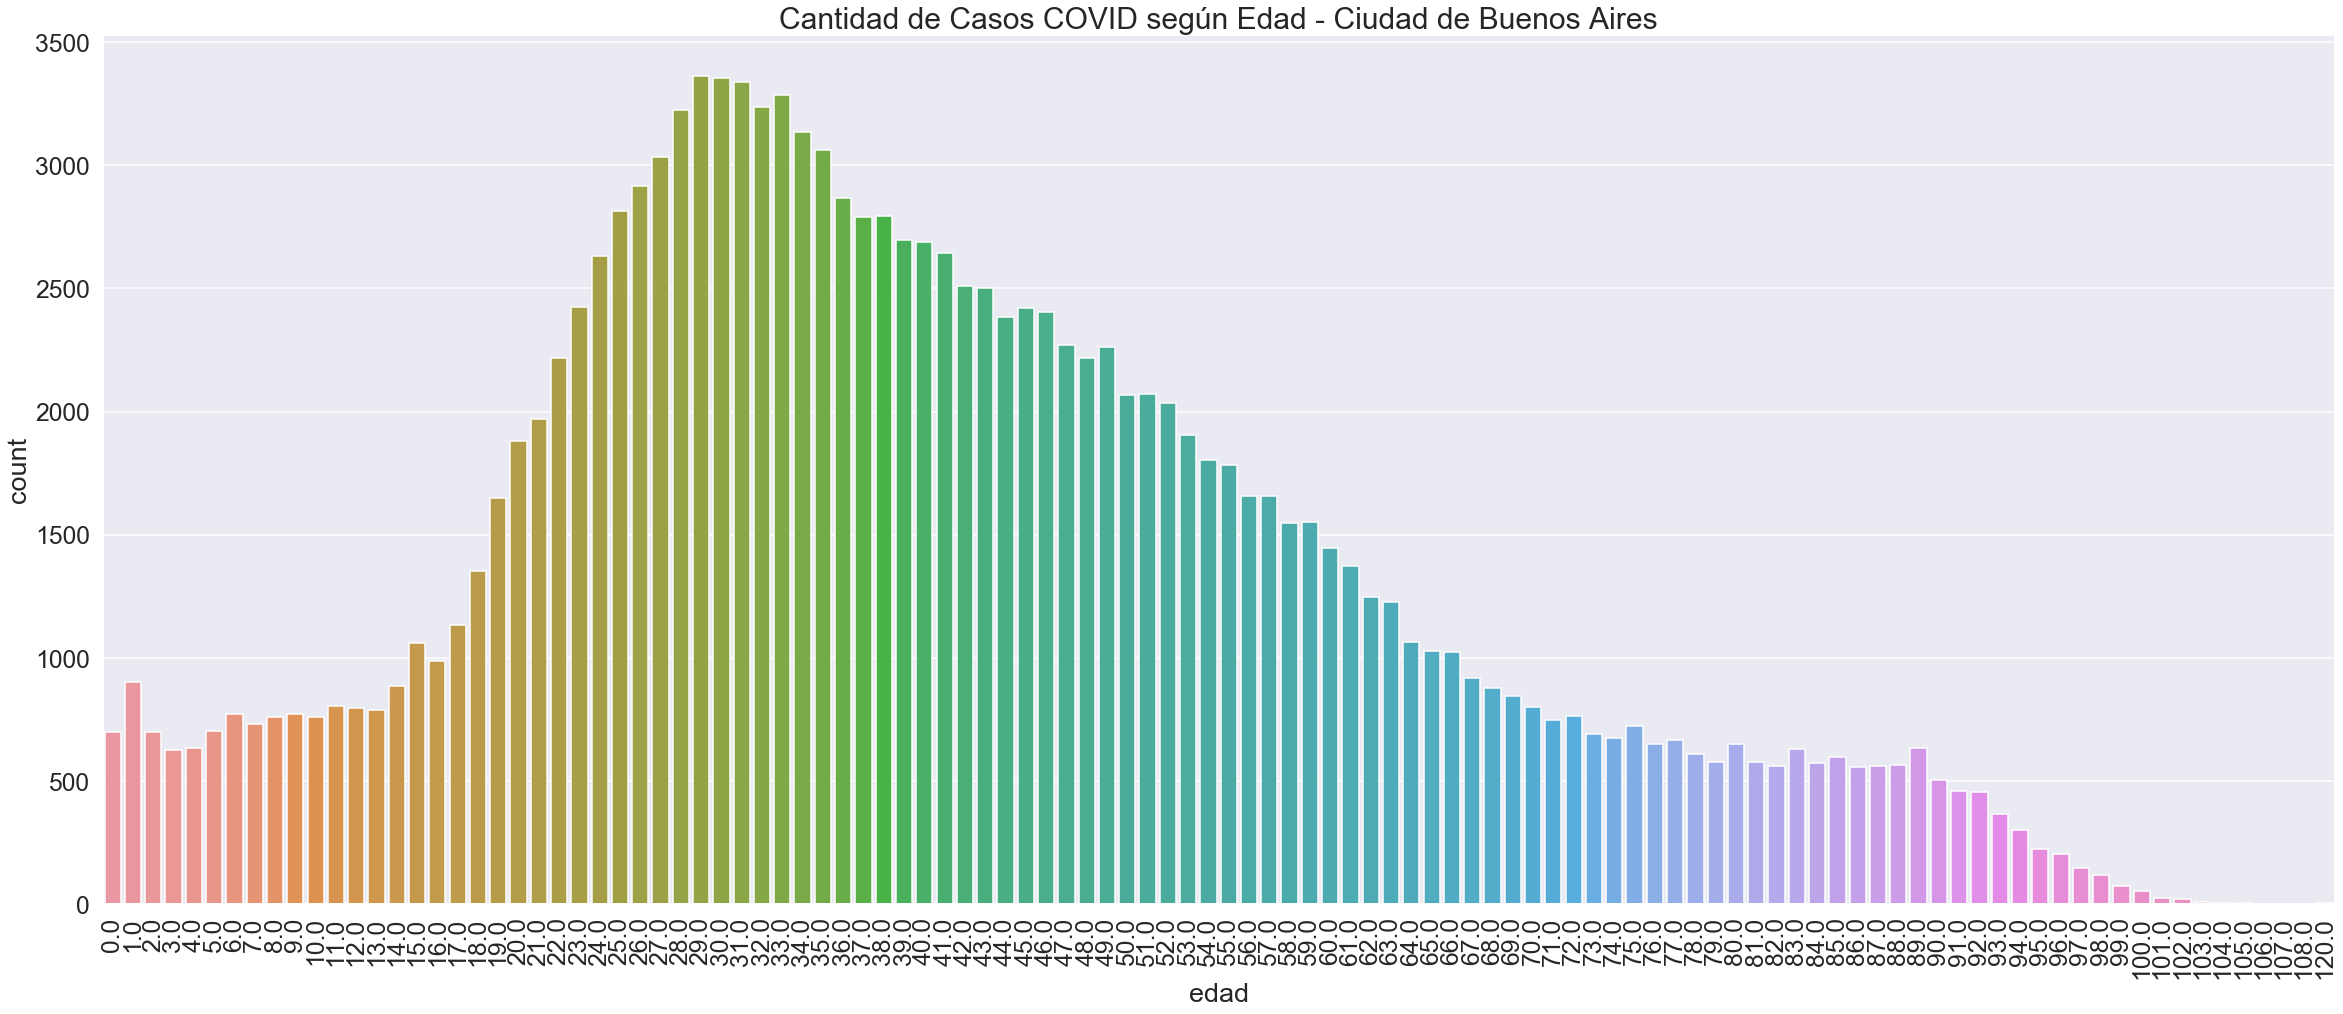

In [306]:
sns.set_context("talk", font_scale=1.5)
plt.figure(figsize=(40,16))
sns.countplot(covid_caba_df.edad)
plt.title("Cantidad de Casos COVID según Edad - Ciudad de Buenos Aires", size=30)
plt.xticks(rotation=90)
plt.show()

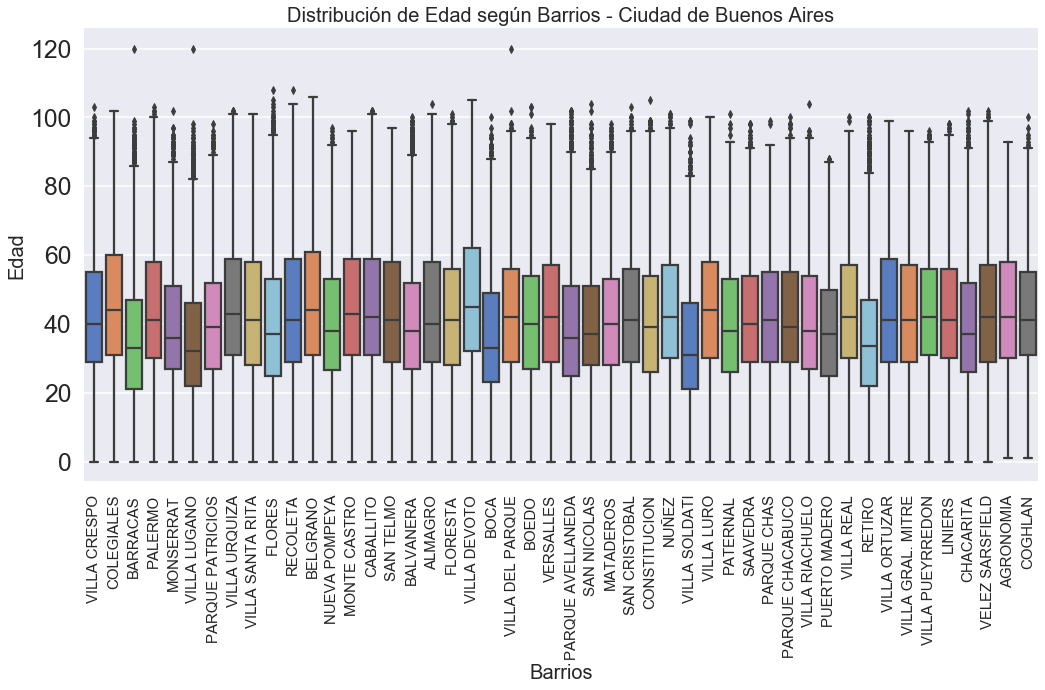

In [307]:
g = sns.catplot(x="barrio",y="edad",
                data=covid_caba_df, 
                kind="box",
                palette = "muted",
                height = 8 ,aspect=2)

g.despine(left=True) # Para quitar linea del Y del plot
g.set_xticklabels(rotation=90, fontsize=15)
plt.xlabel("Barrios",size = 20)
plt.ylabel("Edad",size = 20)
plt.title('Distribución de Edad según Barrios - Ciudad de Buenos Aires',size = 20)
plt.show()

In [308]:
#Agrupo a los infectados por barrios
group_covidBybarrio_df = covid_caba_df.groupby(["barrio"])["barrio"].count().reset_index(name='casos')

In [309]:
group_covidBybarrio_df.head()

,barrio,casos
0,AGRONOMIA,388
1,ALMAGRO,6217
2,BALVANERA,9003
3,BARRACAS,7294
4,BELGRANO,4215


In [310]:
group_covidBybarrio_df = group_covidBybarrio_df.sort_values(by="casos", ascending=False)

### (03) Dataset CABA densidad

In [311]:
barrios_caba_densidad.head(48)

,comuna,barrio,habitantes,mujer,varon,superficie,densidad_pobacional
0,Comuna 1,CONSTITUCION,44107,23441,20666,2.100,20973.410
1,Comuna 1,MONSERRAT,39914,20974,18940,2.200,18159.140
2,Comuna 1,PUERTO MADERO,6726,3115,3611,5.030,1338.400
3,Comuna 1,RETIRO,65413,34218,31195,4.530,14450.240
4,Comuna 1,SAN NICOLAS,29273,15227,14046,2.290,12784.950
5,Comuna 1,SAN TELMO,20453,10814,9639,1.230,16601.430
6,Comuna 2,RECOLETA,157932,89890,68042,6.290,25100.490
7,Comuna 3,BALVANERA,138926,75653,63273,4.340,31991.010
8,Comuna 3,SAN CRISTOBAL,48611,26283,22328,2.040,23785.650
9,Comuna 4,BARRACAS,89452,46715,42737,7.960,11240.810


In [312]:
barrios_covid_densidad = barrios_caba_densidad.merge(group_covidBybarrio_df, left_on='barrio', right_on='barrio')


In [313]:
barrios_covid_densidad.head(5)

,comuna,barrio,habitantes,mujer,varon,superficie,densidad_pobacional,casos
0,Comuna 1,CONSTITUCION,44107,23441,20666,2.100,20973.410,3017
1,Comuna 1,MONSERRAT,39914,20974,18940,2.200,18159.140,2339
2,Comuna 1,PUERTO MADERO,6726,3115,3611,5.030,1338.400,658
3,Comuna 1,RETIRO,65413,34218,31195,4.530,14450.240,4521
4,Comuna 1,SAN NICOLAS,29273,15227,14046,2.290,12784.950,1925


In [314]:
barrios_covid_densidad['densidad_covid'] = (barrios_covid_densidad.casos / barrios_covid_densidad.superficie)

In [315]:
barrios_covid_densidad = barrios_covid_densidad.sort_values(by=['densidad_covid'], ascending=False)

In [316]:
filter_covid_densidad = barrios_covid_densidad.iloc[:,[1,6,8]]

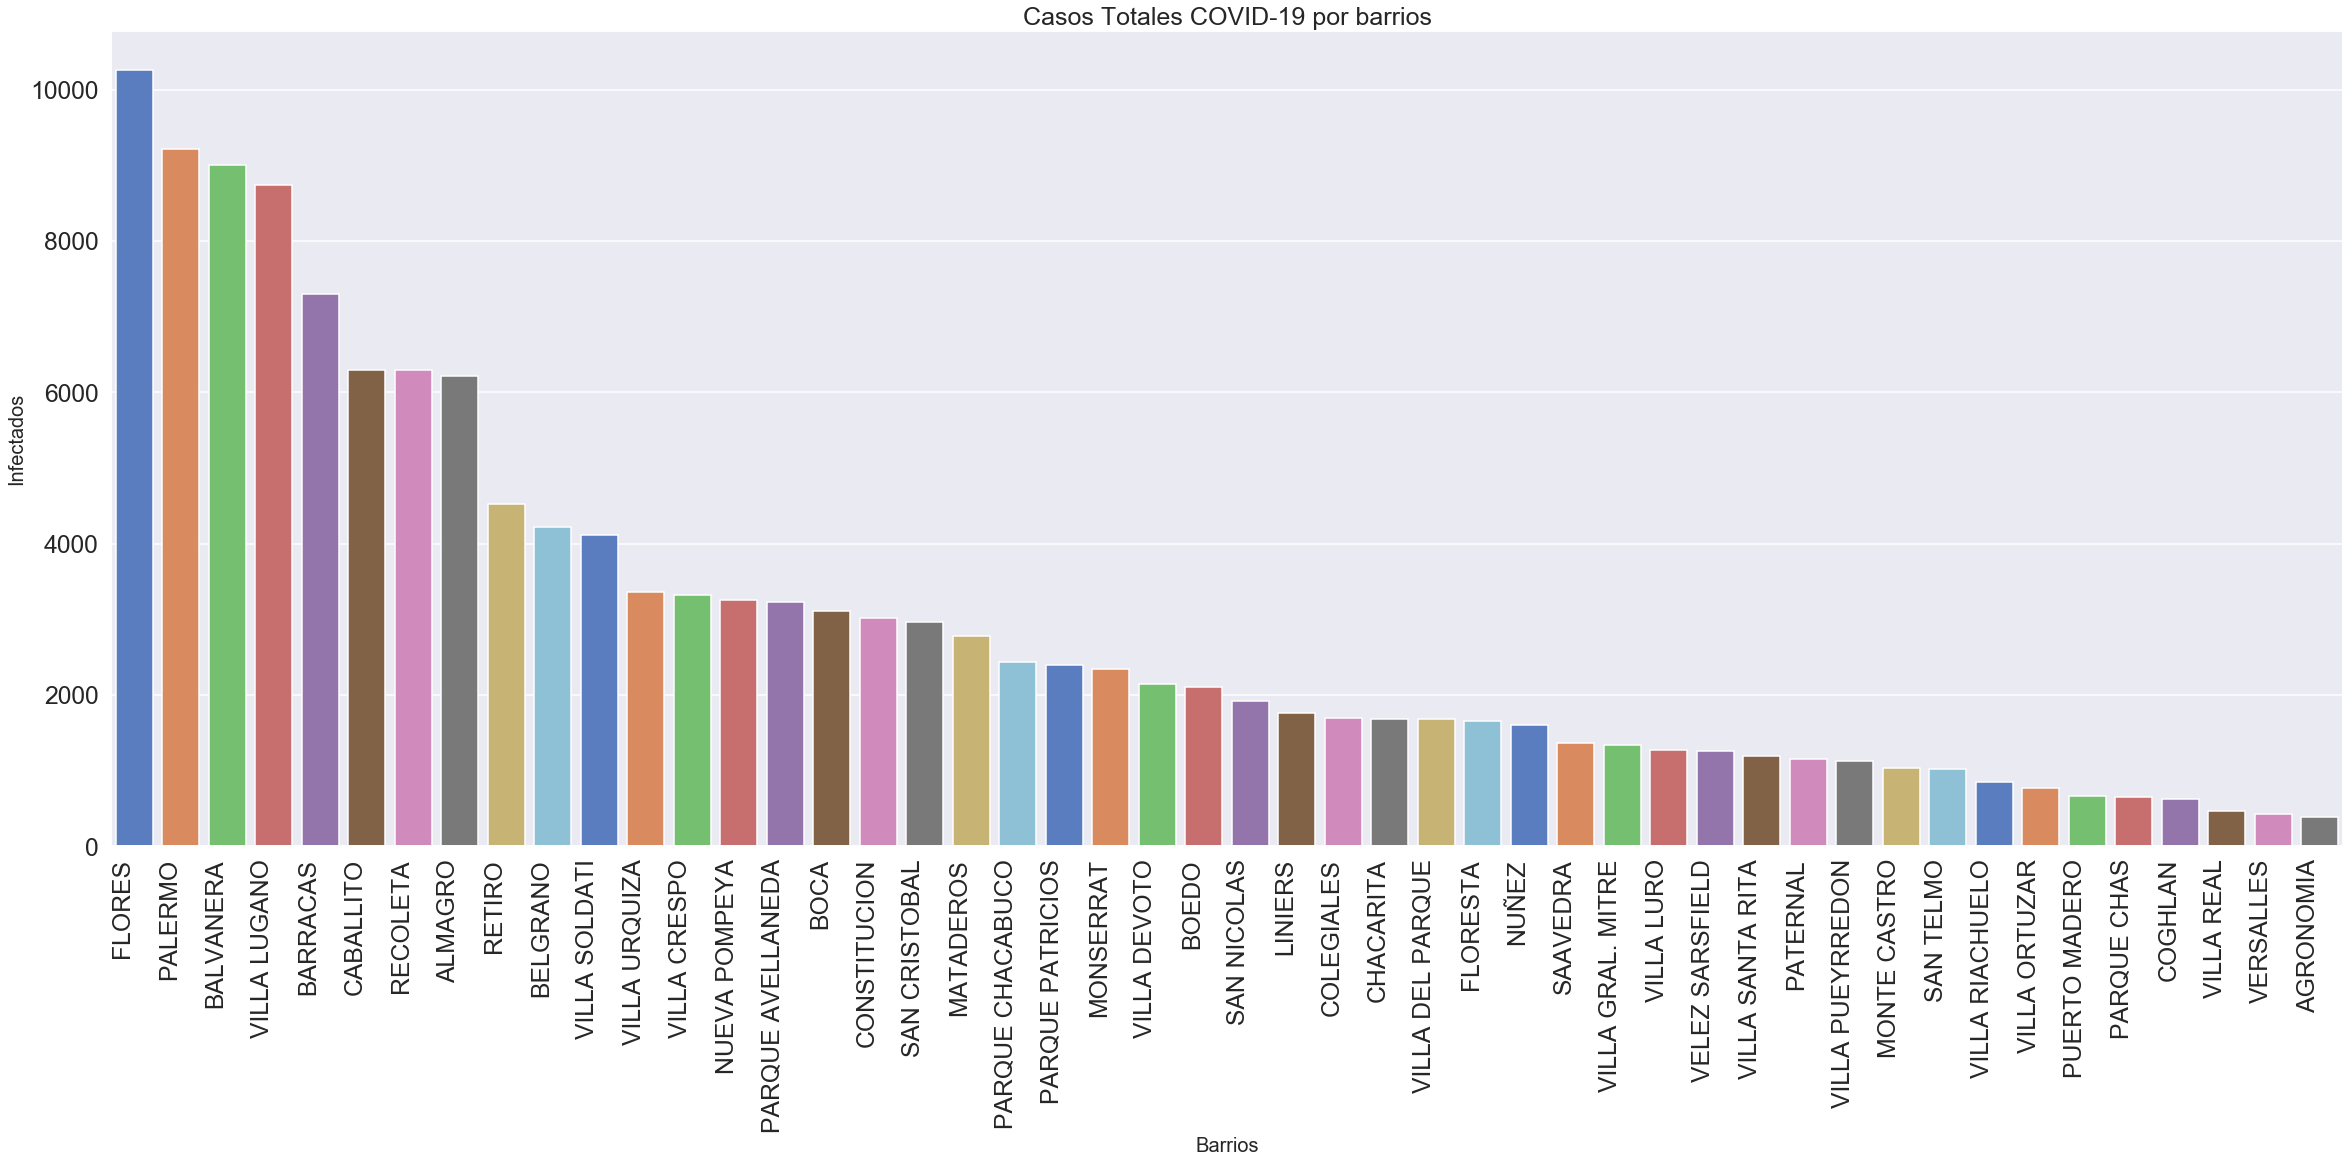

In [317]:

plt.figure(figsize=(40,15))
g = sns.barplot(x="barrio",y="casos",data=group_covidBybarrio_df,
                  palette = "muted")

g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Casos Totales COVID-19 por barrios', size = 25)
plt.xlabel("Barrios", size = 20)
plt.ylabel("Infectados", size = 20)
plt.show()

In [318]:
barrios_caba_densidad = barrios_caba_densidad.sort_values(by=['densidad_pobacional'], ascending=False)

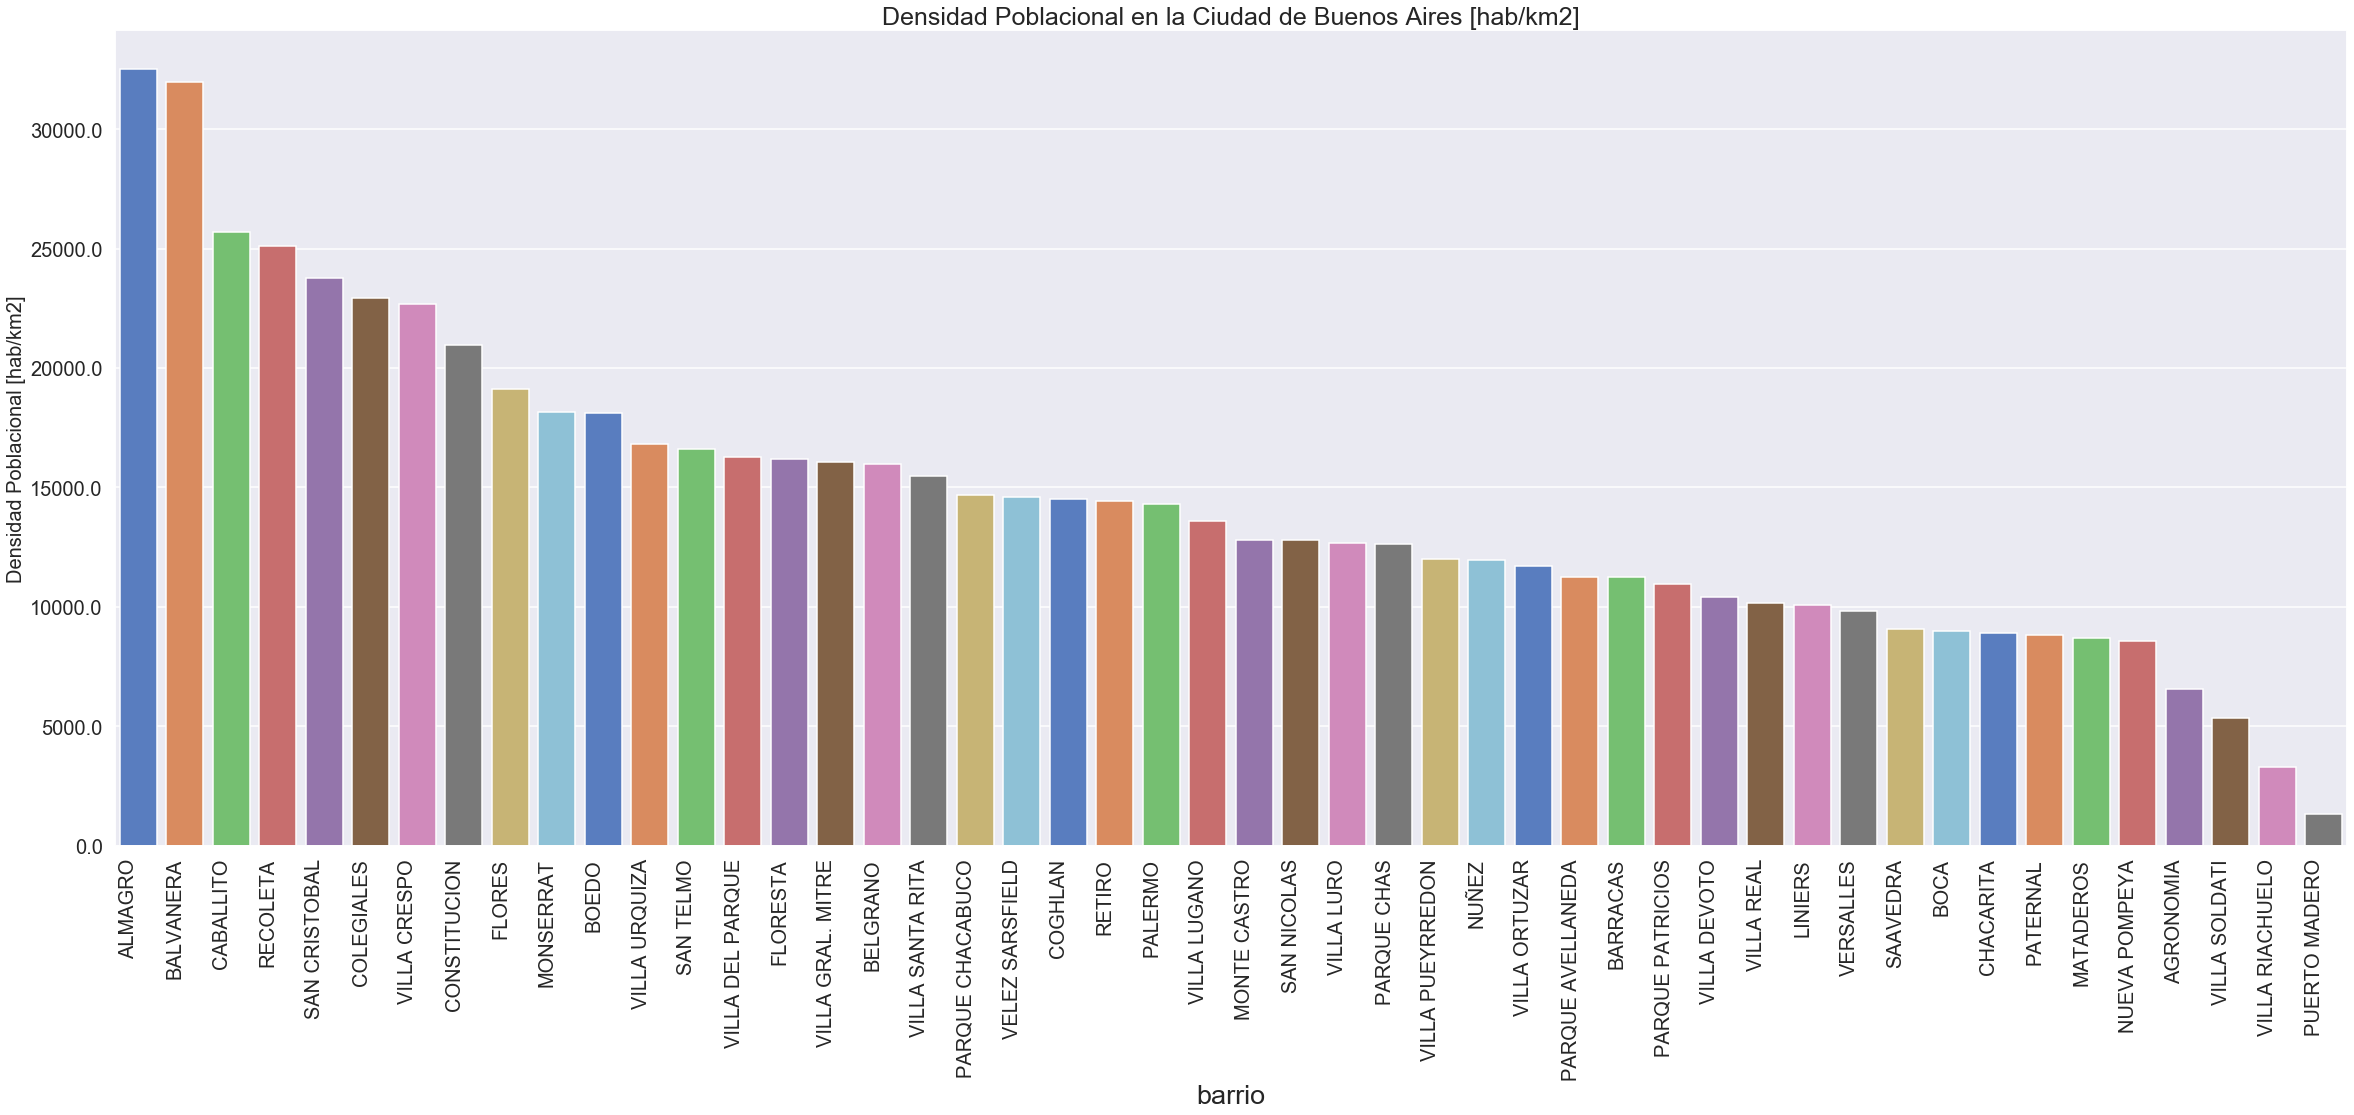

In [319]:

plt.figure(figsize=(40,15))
g = sns.barplot(y="densidad_pobacional",x="barrio", data=barrios_caba_densidad,
                  palette = "muted")

plt.title('Densidad Poblacional en la Ciudad de Buenos Aires [hab/km2]', size = 25)
#plt.xlabel("Barrios", size = 30)
plt.ylabel("Densidad Poblacional [hab/km2]", size = 20)
g.set_yticklabels(g.get_yticks(), size = 20)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right", size=20)
plt.show()

In [320]:
barrios_covid_densidad.columns

Index(['comuna', 'barrio', 'habitantes', 'mujer', 'varon', 'superficie',
       'densidad_pobacional', 'casos', 'densidad_covid'],
      dtype='object')

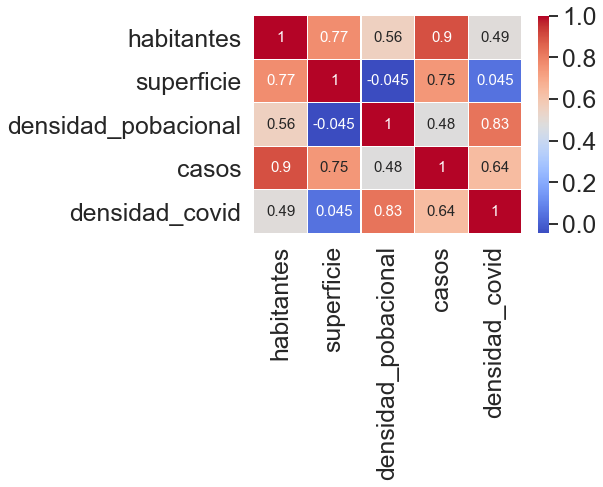

In [321]:
barrios_covid_correlación = barrios_covid_densidad[['habitantes', 'superficie',
       'densidad_pobacional', 'casos', 'densidad_covid']]
sns.heatmap(data=barrios_covid_correlación.corr(), linecolor="white", cbar=True, annot=True, 
            cmap='coolwarm',linewidths=0.1, annot_kws={"size":15})
sns.set(font_scale=1)


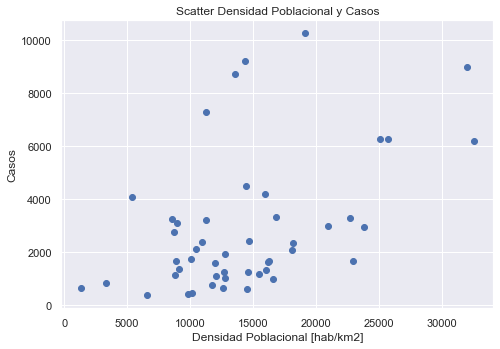

In [322]:
fig=plt.figure()
y1=barrios_covid_densidad.densidad_pobacional
y2=barrios_covid_densidad.casos
ax=fig.add_axes([0,0,1,1])
ax.scatter(y1, y2, color='b')

ax.set_xlabel('Densidad Poblacional [hab/km2]')
ax.set_ylabel('Casos')
ax.set_title('Scatter Densidad Poblacional y Casos')
plt.show()

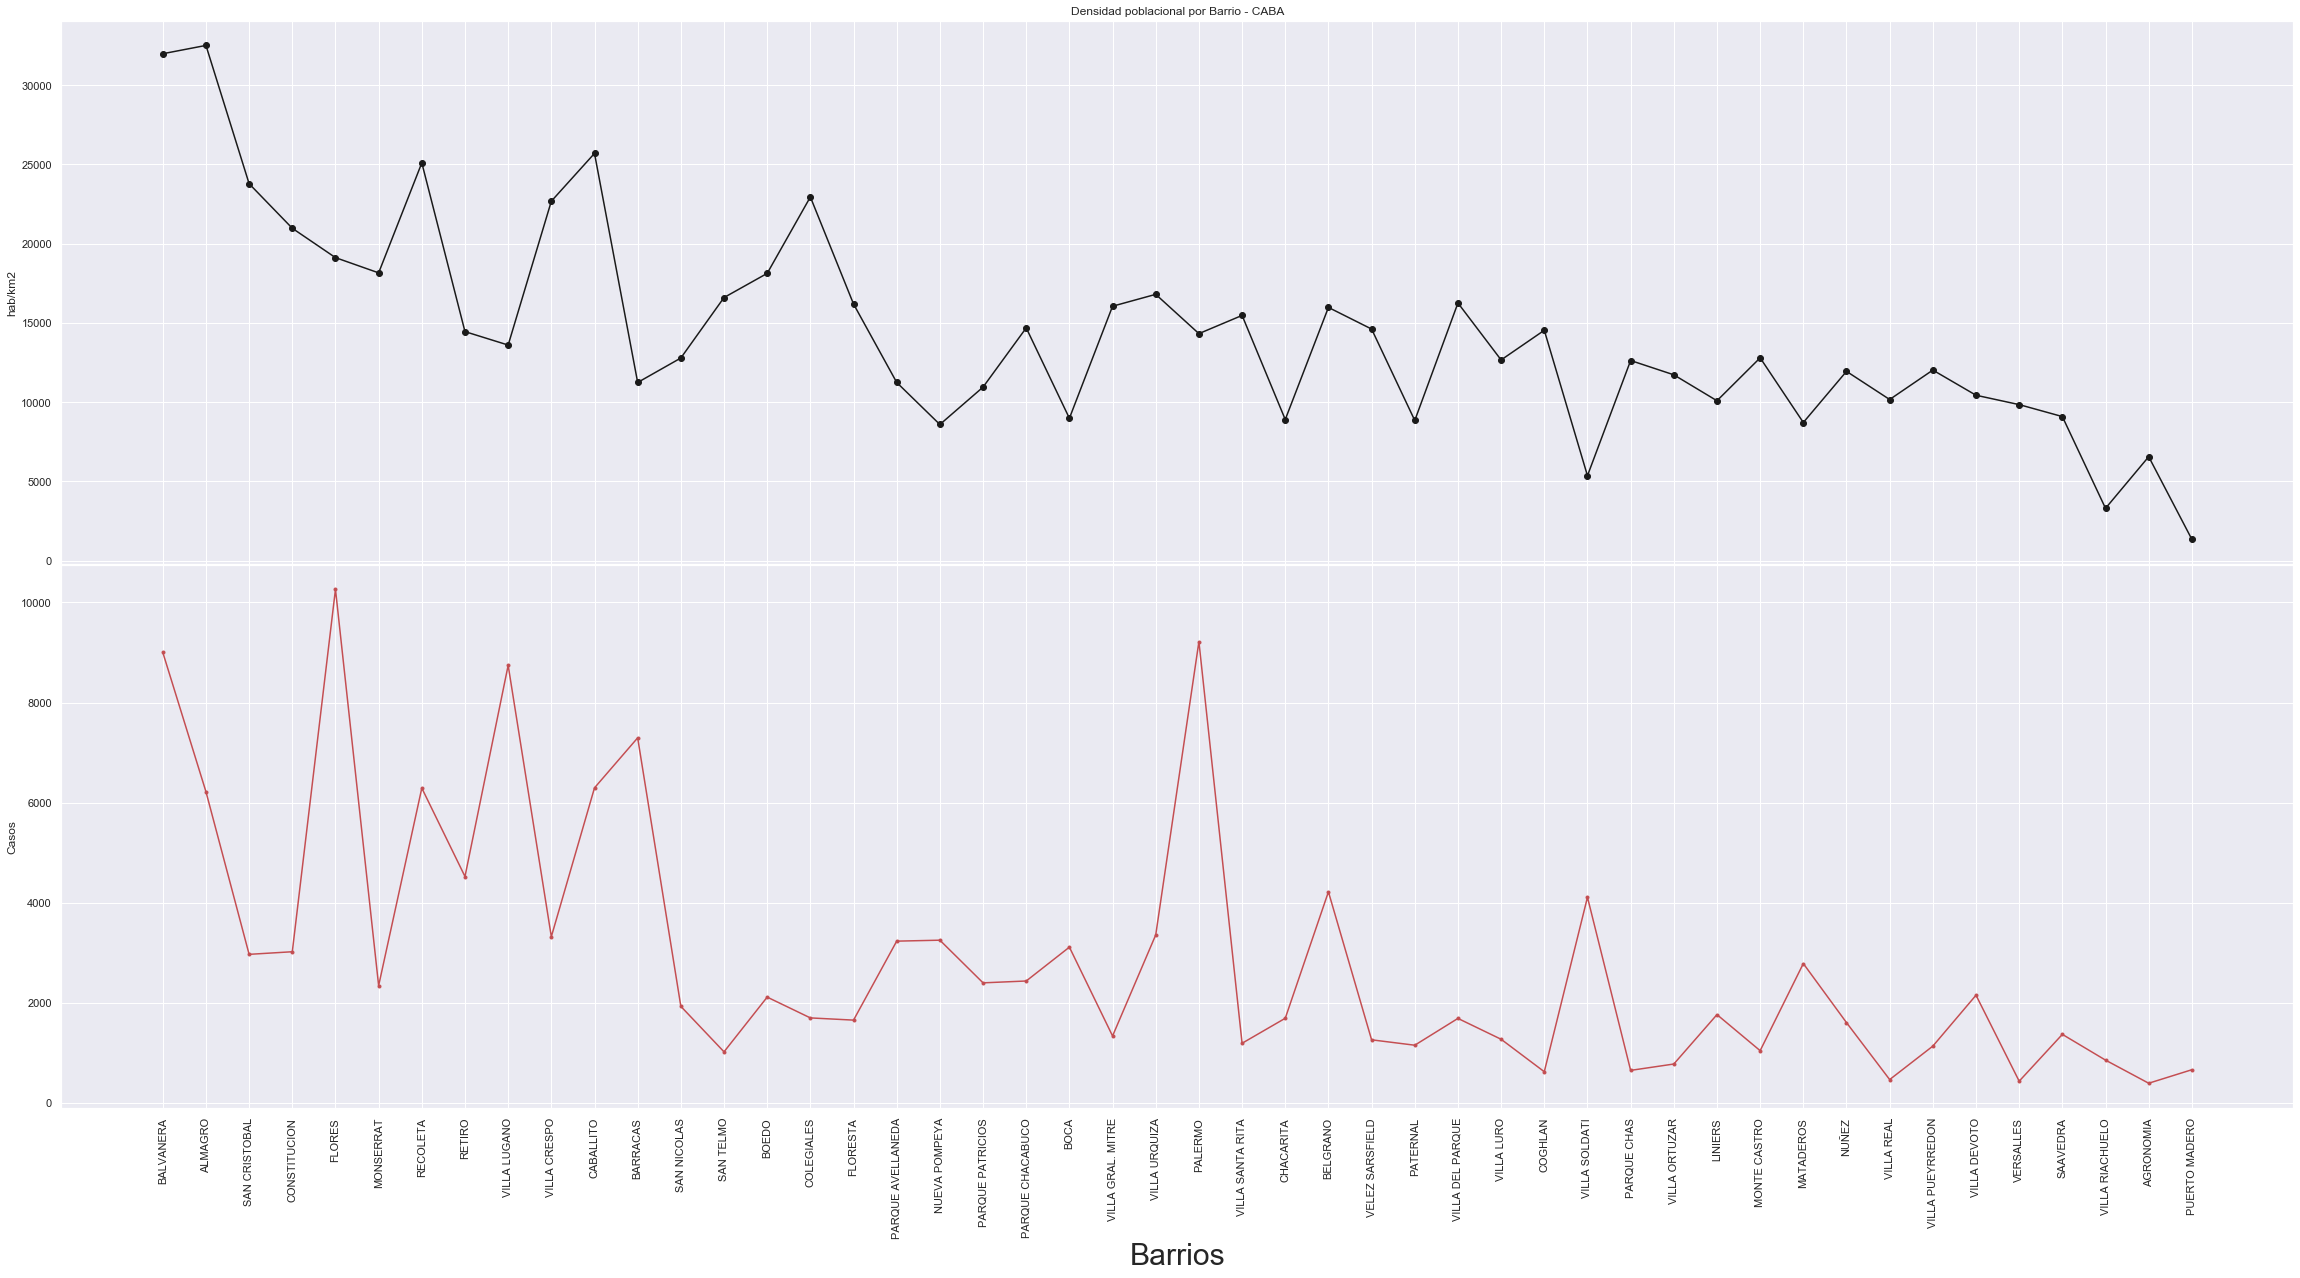

In [323]:

x = barrios_covid_densidad.barrio
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(40,20))
y1=barrios_covid_densidad.densidad_pobacional
y2=barrios_covid_densidad.casos
y3=barrios_covid_densidad.densidad_covid
ax1.plot(x, y1, 'ko-')
ax1.set(title='Densidad poblacional por Barrio - CABA', ylabel='hab/km2')
ax2.plot(x, y2, 'r.-')
ax2.set(ylabel='Casos')
#ax3.plot(x, y3, 'g.-')
#ax3.set(xlabel='Barrio', ylabel='Casos COVID/km2')
plt.xlabel("Barrios", size = 30)
plt.xticks(rotation=90)
plt.subplots_adjust(hspace = .001)
plt.show()

In [324]:
filter_covid_densidad.head(5)

,barrio,densidad_pobacional,densidad_covid
7,BALVANERA,31991.010,2074.424
13,ALMAGRO,32515.090,1535.062
8,SAN CRISTOBAL,23785.650,1453.431
0,CONSTITUCION,20973.410,1436.667
16,FLORES,19120.950,1194.878


### (05) Dataset Clima CABA

In [325]:
clima_caba_df.head(15)

,Fecha,tMax,tMin,tProm,Humedad,vVel,vDir,pMax,pMin,pProm
0,1/1/2020,26.300,19.300,22.800,77,28,Sudeste,1009.900,1015.300,1012.600
1,2/1/2020,28.500,18.200,23.350,76,23,Sur,1014.800,1018.700,1016.750
2,3/1/2020,29.200,20.500,24.850,72,18,Sudoeste,1015.400,1021.000,1018.200
3,4/1/2020,29.500,21.600,25.550,60,35,Norte,1007.900,1015.800,1011.850
4,5/1/2020,31.000,20.100,25.550,62,26,Calma,998.800,1007.700,1003.250
5,6/1/2020,28.800,18.300,23.550,54,66,Sudoeste,1000.100,1006.700,1003.400
6,7/1/2020,31.100,16.600,23.850,42,39,Oeste,1004.800,1008.800,1006.800
7,8/1/2020,32.000,21.600,26.800,47,39,Norte,1001.700,1008.300,1005.000
8,9/1/2020,30.300,22.100,26.200,57,41,Sur,1001.700,1009.400,1005.550
9,10/1/2020,32.500,20.200,26.350,60,24,Calma,1007.500,1010.300,1008.900


In [326]:
# Convierto tipo de dato string a datetime
clima_caba_df.Fecha = pd.to_datetime(clima_caba_df.Fecha,format='%d/%m/%Y')

In [327]:
clima_caba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Fecha    302 non-null    datetime64[ns]
 1   tMax     302 non-null    float64       
 2   tMin     302 non-null    float64       
 3   tProm    302 non-null    float64       
 4   Humedad  302 non-null    int64         
 5   vVel     302 non-null    int64         
 6   vDir     302 non-null    object        
 7   pMax     302 non-null    float64       
 8   pMin     302 non-null    float64       
 9   pProm    302 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 23.7+ KB


In [52]:
#t = clima_caba_df.Fecha

#s1 = clima_caba_df.tMax
#s11 = clima_caba_df.tMin
#s2 = clima_caba_df.Humedad
#s3 = clima_caba_df.vVel
#s4 = clima_caba_df.pMax
#s41 = clima_caba_df.pMin

#fig, axs = plt.subplots(4, 1, sharex=True)
#fig.subplots_adjust(hspace=0)
#axs[0].plot(t, s1, s11)
#axs[1].plot(t, s2)
#axs[2].plot(t, s3)
#axs[3].plot(t, s4, s41)
#plt.show()

In [53]:
#clima_covid_df = clima_caba_df.merge(filter_covid_densidad, left_on='barrio', right_on='barrio')

## Dataset Barrios CABA

In [54]:
if (geopandas_is_installed == True) :
    print(barrios_caba_map.head(3))

         barrio  comuna    perimetro          area  \
0     CHACARITA      15  7724.852955  3.115707e+06   
1      PATERNAL      15  7087.513295  2.229829e+06   
2  VILLA CRESPO      15  8131.857075  3.615978e+06   

                                            geometry  
0  POLYGON ((-58.45282 -34.59599, -58.45366 -34.5...  
1  POLYGON ((-58.46558 -34.59656, -58.46562 -34.5...  
2  POLYGON ((-58.42375 -34.59783, -58.42495 -34.5...  


## Dataset Subte

In [328]:
subte_caba_df.tail(5)

#format mm/dd/YYYY

,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,pax_pagos,pax_pases_pagos,pax_franq,pax_TOTAL
4589766,9/30/2020,23:00:00,23:15:00,LineaA,LineaA_SanPedrito_Este_Turn01,San Pedrito,0.000,0.000,1.000,1.000
4589767,9/30/2020,23:00:00,23:15:00,LineaD,LineaD_Palermo_Turn06,Palermo,0.000,0.000,1.000,1.000
4589768,9/30/2020,23:15:00,23:30:00,LineaD,LineaD_Bulnes_N_Turn01,Bulnes,0.000,0.000,2.000,2.000
4589769,9/30/2020,23:15:00,23:30:00,LineaE,LineaE_RetiroE_S_Turn01,Retiro E,0.000,0.000,1.000,1.000
4589770,9/30/2020,23:30:00,23:45:00,LineaD,LineaD_Pueyrredon_Turn02,Pueyrredon.D,0.000,0.000,1.000,1.000


In [329]:
subte_caba_df["FECHA"] = pd.to_datetime(subte_caba_df["FECHA"], dayfirst=False )
subte_caba_df = subte_caba_df[["FECHA", "pax_TOTAL"]].groupby("FECHA").sum()

In [330]:
subte_caba_df["FECHA"]=subte_caba_df.index
subte_caba_df.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2020-01-01 to 2020-12-02
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pax_TOTAL  260 non-null    float64       
 1   FECHA      260 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.1 KB


In [331]:
#subte_caba_df.FECHA = pd.to_datetime(subte_caba_df.FECHA,format='%m/%d/%Y',errors='coerce')
subte_caba_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2020-01-01 to 2020-12-02
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   pax_TOTAL  260 non-null    float64       
 1   FECHA      260 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.1 KB


In [333]:
subte_caba_df.head()

,pax_TOTAL,FECHA
FECHA,,
2020-01-01,109974.000,2020-01-01
2020-01-02,331100.000,2020-01-02
2020-01-13,974353.000,2020-01-13
2020-01-14,931131.000,2020-01-14
2020-01-15,926238.000,2020-01-15


In [58]:
try: subte_caba_df['barrio']
except KeyError: is_init = True

if (geopandas_is_installed == True and  is_init == True):
    is_init = False
    subte_caba_df['ESTACION'] = subte_caba_df['ESTACION'].str.upper() 
    for i in ba_subte_map.index: 
        ba_subte_map.at[i,'barrio'] = barrios_caba_map[barrios_caba_map.geometry.intersects(ba_subte_map.loc[i].geometry)].barrio.values[0]
    merge_estacion = ba_subte_map.iloc[:,[1,4]]  
    subte_caba_df = subte_caba_df.merge(merge_estacion, left_on='ESTACION', right_on='ESTACION')
  


In [59]:
try: group_subteByLinea_df
except NameError: group_subteByLinea_df = None
if (geopandas_is_installed == True and group_subteByLinea_df is None) :
   
    group_subteByLinea_df = subte_caba_df.groupby(["barrio"])["pax_TOTAL"].sum().reset_index(name='pasajeros')


In [334]:
subte_caba_df["FECHA"] = pd.to_datetime(subte_caba_df["FECHA"], dayfirst=False )


In [335]:
subte_caba_df

,pax_TOTAL,FECHA
FECHA,,
2020-01-01,109974.000,2020-01-01
2020-01-02,331100.000,2020-01-02
2020-01-13,974353.000,2020-01-13
2020-01-14,931131.000,2020-01-14
2020-01-15,926238.000,2020-01-15
...,...,...
2020-10-02,1035204.000,2020-10-02
2020-11-01,395037.000,2020-11-01
2020-11-02,1123044.000,2020-11-02


## Agrego al  mapa de CABA informacion que necesito

In [62]:
if (geopandas_is_installed == True and isFirst == True) :
    isFirst = False
    barrios_caba_map = barrios_caba_map.merge(group_covidBybarrio_df, left_on='barrio', right_on='barrio')
    barrios_caba_map = barrios_caba_map.merge(filter_covid_densidad, left_on='barrio', right_on='barrio')
    barrios_caba_map = pd.merge(barrios_caba_map,group_subteByLinea_df, left_on='barrio', right_on='barrio',how='left')
 

## HeatMap de Densidad poblacion por Barrios

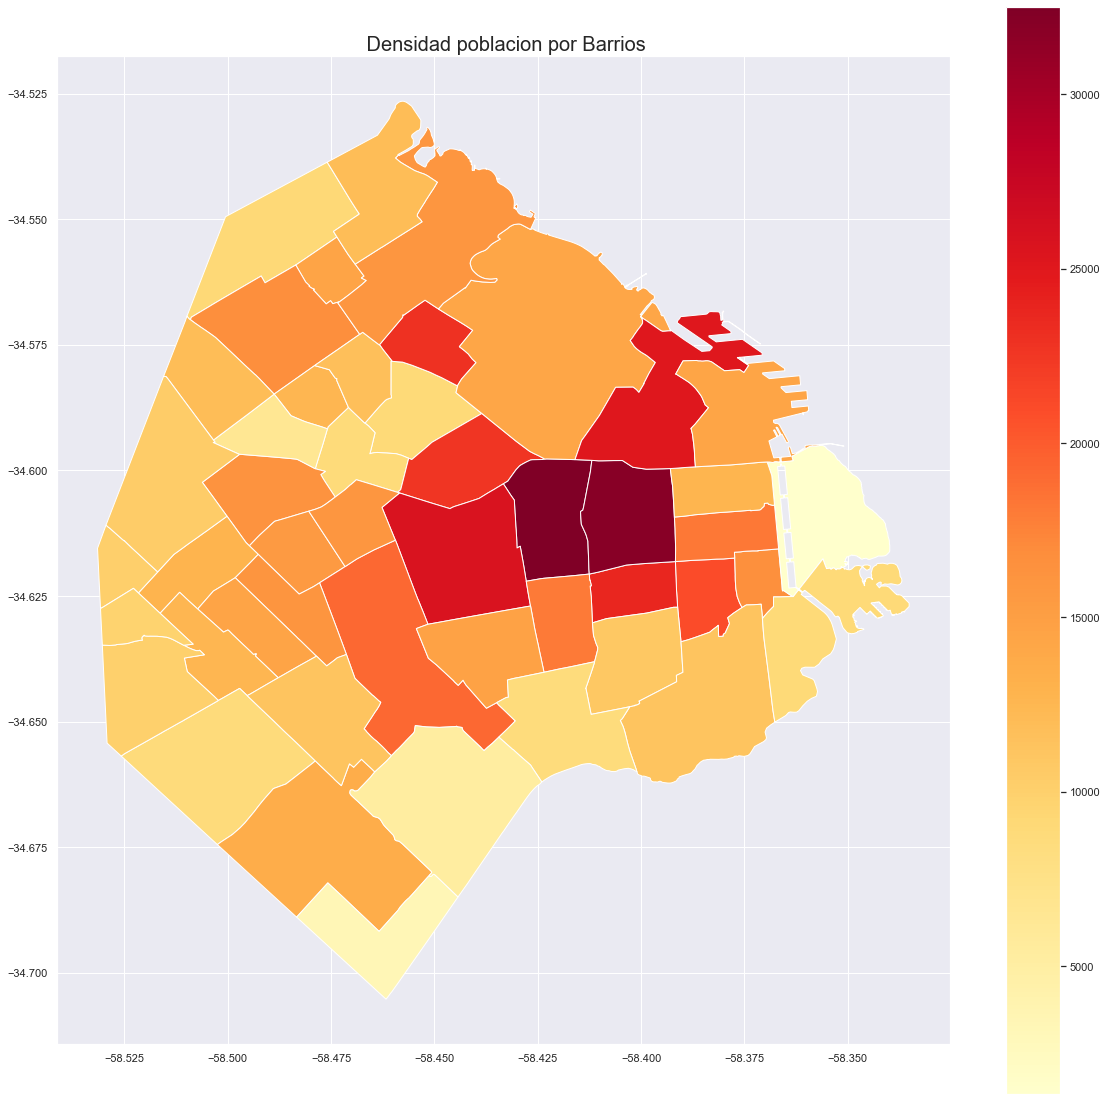

In [63]:
if (geopandas_is_installed == True):
    fig, ax = plt.subplots(1,1,figsize=[20,20])
    plt.title(' Densidad poblacion por Barrios', size = 20)
    barrios_caba_map.plot(column="densidad_pobacional",ax=ax,legend=True,cmap='YlOrRd')

## HeatMap de Barrios contagiados

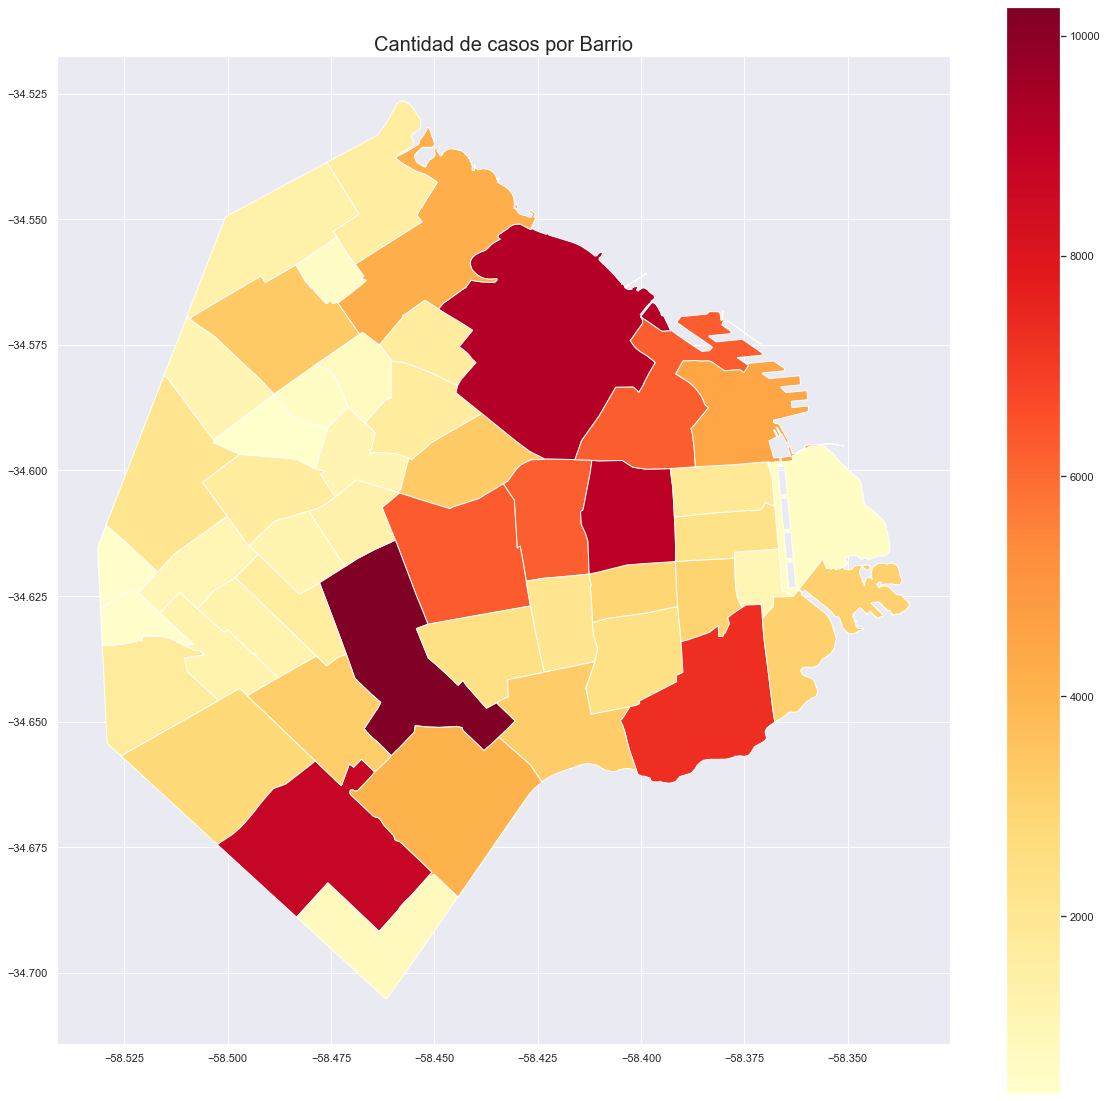

In [64]:
if (geopandas_is_installed == True):
    fig, ax = plt.subplots(1,1,figsize=[20,20])
    #tesd= ba_comuna_map[ba_comuna_map.barrio == "FLORES"]
    #ax.text(tesd.geometry.centroid.x,tesd.geometry.centroid.y,'Covid')
    plt.title('Cantidad de casos por Barrio', size = 20)
    barrios_caba_map.plot(column="casos",ax=ax,legend=True,cmap='YlOrRd')


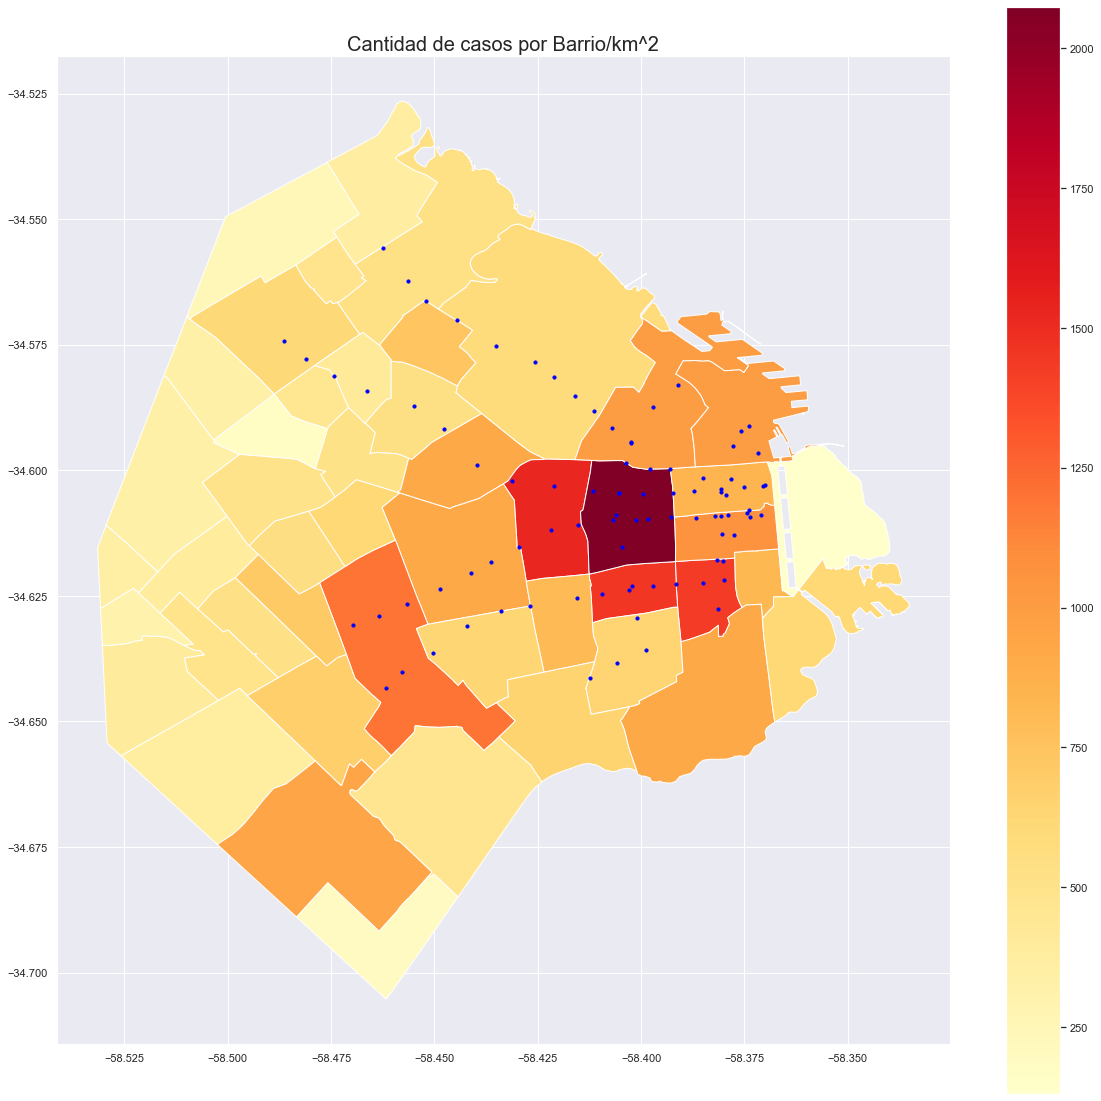

In [65]:
if (geopandas_is_installed == True):
    fig, ax = plt.subplots(1,1,figsize=[20,20])
    gis_ba_map = barrios_caba_map.plot(column="densidad_covid",ax=ax,legend=True,cmap='YlOrRd')
    plt.title('Cantidad de casos por Barrio/km^2', size = 20)
    ba_subte_map.plot(ax=gis_ba_map,color='blue',markersize=10)

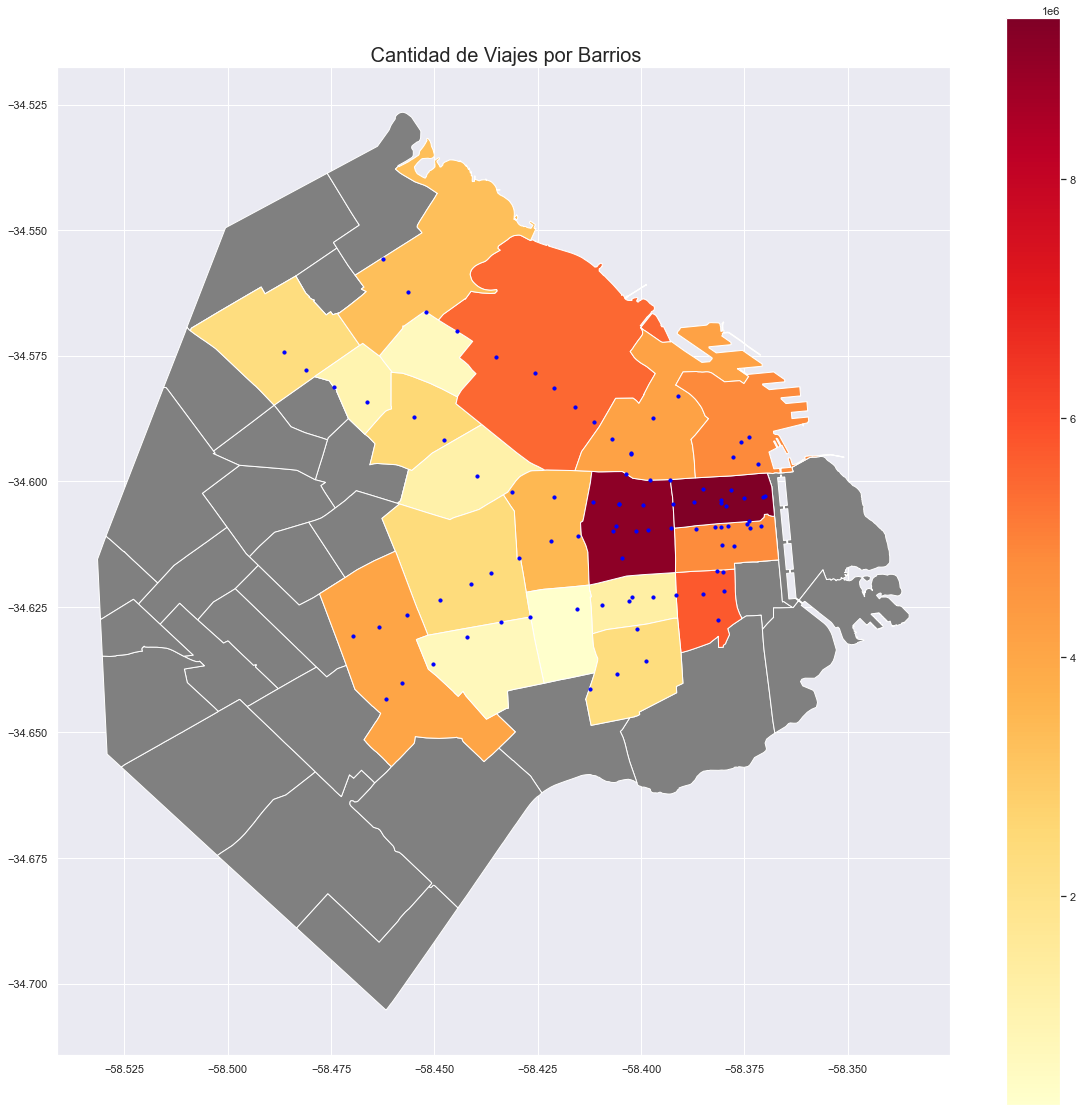

In [66]:
if (geopandas_is_installed == True):
    fig, ax = plt.subplots(1,1,figsize=[20,20])
    gis_bap_map = barrios_caba_map.plot(ax=ax,color='grey')

    gis_ba_map = barrios_caba_map.plot(column="pasajeros",ax=gis_bap_map,legend=True,cmap='YlOrRd')
    plt.title(' Cantidad de Viajes por Barrios', size = 20)
    ba_subte_map.plot(ax=gis_ba_map,color='blue',markersize=10)

In [336]:
covid_palermo_df = covid_caba_df[(covid_caba_df.barrio == 'PALERMO') 
                                   & (covid_df.clasificacion == 'confirmado') 
                                   & (covid_df.fecha_toma_muestra > '2020-01-01')]
group_covidBypalermo_df = covid_palermo_df.groupby(["fecha_toma_muestra"])["barrio"].count().reset_index(name='casos')

indexMuestraPalermo = group_covidBypalermo_df.set_index(['fecha_toma_muestra'])



C:\Users\Juan Ignacio\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [337]:
covid_balvanera_df = covid_caba_df[(covid_caba_df.barrio == 'BALVANERA') 
                                   & (covid_df.clasificacion == 'confirmado') 
                                   & (covid_df.fecha_toma_muestra > '2020-01-01')]
group_covidBybalvanera_df = covid_balvanera_df.groupby(["fecha_toma_muestra"])["barrio"].count().reset_index(name='casos')

indexMuestraBalvanera = group_covidBybalvanera_df.set_index(['fecha_toma_muestra'])

C:\Users\Juan Ignacio\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [338]:
clima_caba_df = clima_caba_df[clima_caba_df.Fecha > '2020-03-01']
indexM=clima_caba_df.set_index(['Fecha'])
rolweathermean = indexM.rolling(window=12).mean()

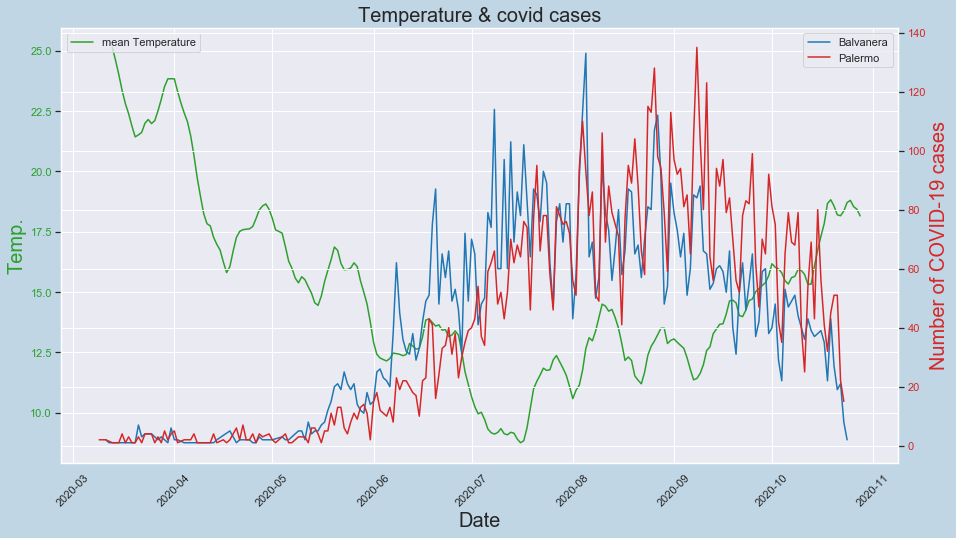

In [339]:

fig, ax1 = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)
fig.patch.set_facecolor('#c0d6e4')
color = 'tab:green'
ax1.set_xlabel('Date', size=20)
ax1.set_ylabel('Temp.', color=color,size=20)
plt.plot(rolweathermean['tProm'],color=color, label='mean Temperature')
ax1.legend(loc="upper left")
ax1.tick_params(axis='y', labelcolor=color)

#ax1.annotate('Temp. minima 8.75ºC', xy=('2020-07-16', 8.75), xytext=('2020-08-01', 8),size = 20,
            #arrowprops=dict(facecolor='black', shrink=0.05))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Number of COVID-19 cases', color=color,size=20)  # we already handled the x-label with ax1
ax2.plot(indexMuestraBalvanera, color=color, label='Balvanera')
ax2.legend(loc="upper right")
ax2.tick_params(axis='y', labelcolor=color)

#ax2.annotate('133 COVID-19 cases', xy=('2020-08-05', 133), xytext=('2020-05-01', 120),size = 20,
            #arrowprops=dict(facecolor='black', shrink=0.05))

color = 'tab:red'
ax2.set_ylabel('Number of COVID-19 cases', color=color,size=20)  # we already handled the x-label with ax1
ax2.plot(indexMuestraPalermo, color=color, label='Palermo')
ax2.legend(loc="upper right")
ax2.tick_params(axis='y', labelcolor=color)


#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.title('Temperature & covid cases', size = 20)

plt.show()

### Pre Proccesing

In [340]:
covid_caba_clean = covid_caba_df[['fecha_toma_muestra', 'barrio', 'genero', 'edad', 'clasificacion']]
covid_caba_clean = covid_caba_clean.merge(barrios_caba_densidad, on="barrio", how="inner")
covid_caba_clean.head(3)
covid_caba_clean.shape


(140172, 11)

In [341]:
covid_caba_clean = covid_caba_clean.merge(clima_caba_df, left_on="fecha_toma_muestra", right_on="Fecha", how="inner")
covid_caba_clean.info()

covid_caba_clean.clasificacion.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139862 entries, 0 to 139861
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   fecha_toma_muestra   139862 non-null  datetime64[ns]
 1   barrio               139862 non-null  object        
 2   genero               139862 non-null  object        
 3   edad                 139827 non-null  float64       
 4   clasificacion        139862 non-null  object        
 5   comuna               139862 non-null  object        
 6   habitantes           139862 non-null  int64         
 7   mujer                139862 non-null  int64         
 8   varon                139862 non-null  int64         
 9   superficie           139862 non-null  float64       
 10  densidad_pobacional  139862 non-null  float64       
 11  Fecha                139862 non-null  datetime64[ns]
 12  tMax                 139862 non-null  float64       
 13  tMin          

array(['confirmado'], dtype=object)

In [411]:
#BORRO la parte subtes
covid_caba_clean = covid_caba_clean.merge(subte_caba_df, left_on="fecha_toma_muestra", right_on=subte_caba_df["FECHA"], how="inner")
covid_caba_clean.head(5)


,fecha_toma_muestra,barrio,genero,edad,clasificacion,comuna,habitantes,mujer,varon,superficie,...,vDir,pMax,pMin,pProm,pax_TOTAL_x,FECHA_x,pax_TOTAL_y,FECHA_y,pax_TOTAL,FECHA
0,2020-03-03,SAN CRISTOBAL,masculino,47.000,confirmado,Comuna 3,48611,26283,22328,2.040,...,Norte,1013.400,1017.000,1015.200,1118806.000,2020-03-03,1118806.000,2020-03-03,1118806.000,2020-03-03
1,2020-03-04,VILLA DEL PARQUE,masculino,68.000,confirmado,Comuna 11,55273,30213,25060,3.400,...,Calma,1014.400,1016.700,1015.550,1135479.000,2020-03-04,1135479.000,2020-03-04,1135479.000,2020-03-04
2,2020-03-05,BOEDO,masculino,45.000,confirmado,Comuna 5,47306,25371,21935,2.610,...,Norte,1015.100,1018.900,1017.000,1164013.000,2020-03-05,1164013.000,2020-03-05,1164013.000,2020-03-05
3,2020-03-05,SAN TELMO,masculino,65.000,confirmado,Comuna 1,20453,10814,9639,1.230,...,Norte,1015.100,1018.900,1017.000,1164013.000,2020-03-05,1164013.000,2020-03-05,1164013.000,2020-03-05
4,2020-03-05,BELGRANO,masculino,24.000,confirmado,Comuna 13,126831,70358,56473,7.940,...,Norte,1015.100,1018.900,1017.000,1164013.000,2020-03-05,1164013.000,2020-03-05,1164013.000,2020-03-05


In [412]:
covid_caba_clean = covid_caba_clean.sort_values(by="fecha_toma_muestra", ascending=True)
covid_caba_clean.shape

(126983, 27)

In [205]:
#solo trabajamos con Balvanera y Palermo
#caba_neighs_dummie = pd.get_dummies(covid_caba_clean.barrio)
#caba_neighs_dummie.head(5)
#caba_neighs_dummie.shape

In [344]:
#covid_caba_clean = covid_caba_clean[((covid_caba_clean.barrio == 'BALVANERA') | (covid_caba_clean.barrio == 'PALERMO'))  & (covid_caba_clean.fecha_toma_muestra > '2020-03-01')] 
covid_caba_clean.shape

(126983, 23)

In [345]:
caba_genero_dummie = pd.get_dummies(covid_caba_clean.genero)
caba_clasificacion_dummie = pd.get_dummies(covid_caba_clean.clasificacion)


In [346]:
covid_caba_clean

,fecha_toma_muestra,barrio,genero,edad,clasificacion,comuna,habitantes,mujer,varon,superficie,...,tMin,tProm,Humedad,vVel,vDir,pMax,pMin,pProm,pax_TOTAL,FECHA
126982,2020-03-03,SAN CRISTOBAL,masculino,47.000,confirmado,Comuna 3,48611,26283,22328,2.040,...,22.500,27.150,70,30,Norte,1013.400,1017.000,1015.200,1118806.000,2020-03-03
126981,2020-03-04,VILLA DEL PARQUE,masculino,68.000,confirmado,Comuna 11,55273,30213,25060,3.400,...,21.000,26.600,70,20,Calma,1014.400,1016.700,1015.550,1135479.000,2020-03-04
126979,2020-03-05,BOEDO,masculino,45.000,confirmado,Comuna 5,47306,25371,21935,2.610,...,21.600,25.600,70,24,Norte,1015.100,1018.900,1017.000,1164013.000,2020-03-05
126978,2020-03-05,SAN TELMO,masculino,65.000,confirmado,Comuna 1,20453,10814,9639,1.230,...,21.600,25.600,70,24,Norte,1015.100,1018.900,1017.000,1164013.000,2020-03-05
126977,2020-03-05,BELGRANO,masculino,24.000,confirmado,Comuna 13,126831,70358,56473,7.940,...,21.600,25.600,70,24,Norte,1015.100,1018.900,1017.000,1164013.000,2020-03-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73119,2020-10-02,RECOLETA,masculino,55.000,confirmado,Comuna 2,157932,89890,68042,6.290,...,7.500,11.950,66,44,Este,1014.100,1028.900,1021.500,1035204.000,2020-10-02
73120,2020-10-02,RECOLETA,masculino,23.000,confirmado,Comuna 2,157932,89890,68042,6.290,...,7.500,11.950,66,44,Este,1014.100,1028.900,1021.500,1035204.000,2020-10-02
73121,2020-10-02,RECOLETA,masculino,64.000,confirmado,Comuna 2,157932,89890,68042,6.290,...,7.500,11.950,66,44,Este,1014.100,1028.900,1021.500,1035204.000,2020-10-02
73110,2020-10-02,FLORES,masculino,60.000,confirmado,Comuna 7,164310,87984,76326,8.590,...,7.500,11.950,66,44,Este,1014.100,1028.900,1021.500,1035204.000,2020-10-02


In [347]:
covid_caba_casos = covid_caba_df.groupby(["fecha_toma_muestra"])['clasificacion'].count().reset_index(name='clasificacion')


In [348]:
covid_caba_casos.head(4)

,fecha_toma_muestra,clasificacion
0,2019-07-20,1
1,2019-07-30,1
2,2019-08-28,1
3,2020-02-06,1


In [349]:
covid_caba_casos["Casos Día Anterior"]=covid_caba_casos.clasificacion.shift(1)
covid_caba_casos

,fecha_toma_muestra,clasificacion,Casos Día Anterior
0,2019-07-20,1,nan
1,2019-07-30,1,1.000
2,2019-08-28,1,1.000
3,2020-02-06,1,1.000
4,2020-02-16,1,1.000
...,...,...,...
236,2020-10-20,619,612.000
237,2020-10-21,491,619.000
238,2020-10-22,365,491.000
239,2020-10-23,158,365.000


In [350]:
covid_caba_clean.columns

Index(['fecha_toma_muestra', 'barrio', 'genero', 'edad', 'clasificacion',
       'comuna', 'habitantes', 'mujer', 'varon', 'superficie',
       'densidad_pobacional', 'Fecha', 'tMax', 'tMin', 'tProm', 'Humedad',
       'vVel', 'vDir', 'pMax', 'pMin', 'pProm', 'pax_TOTAL', 'FECHA'],
      dtype='object')

In [413]:
caba_regression_covid = covid_caba_clean[['fecha_toma_muestra', 'Fecha', 'tMax', 'tMin', 'Humedad',
       'vVel', "vDir", 'pProm', 'pax_TOTAL']]
caba_regression_covid

,fecha_toma_muestra,Fecha,tMax,tMin,Humedad,vVel,vDir,pProm,pax_TOTAL
0,2020-03-03,2020-03-03,31.800,22.500,70,30,Norte,1015.200,1118806.000
1,2020-03-04,2020-03-04,32.200,21.000,70,20,Calma,1015.550,1135479.000
2,2020-03-05,2020-03-05,29.600,21.600,70,24,Norte,1017.000,1164013.000
3,2020-03-05,2020-03-05,29.600,21.600,70,24,Norte,1017.000,1164013.000
4,2020-03-05,2020-03-05,29.600,21.600,70,24,Norte,1017.000,1164013.000
...,...,...,...,...,...,...,...,...,...
126399,2020-10-02,2020-10-02,16.400,7.500,66,44,Este,1021.500,1035204.000
126400,2020-10-02,2020-10-02,16.400,7.500,66,44,Este,1021.500,1035204.000
126401,2020-10-02,2020-10-02,16.400,7.500,66,44,Este,1021.500,1035204.000
126390,2020-10-02,2020-10-02,16.400,7.500,66,44,Este,1021.500,1035204.000


#### Feature Engineering

In [414]:
caba_wind_dummie = pd.get_dummies(caba_regression_covid.vDir)
caba_wind_dummie

,Calma,Este,Noreste,Norte,Oeste,Sudeste,Sudoeste,Sur
0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
126399,0,1,0,0,0,0,0,0
126400,0,1,0,0,0,0,0,0
126401,0,1,0,0,0,0,0,0
126390,0,1,0,0,0,0,0,0


In [419]:
caba_regression_covid = caba_regression_covid.join([caba_wind_dummie])
#caba_regression_covid.head(5)
covid_caba_casos

ValueError: Indexes have overlapping values: Index(['Calma', 'Este', 'Noreste', 'Norte', 'Oeste', 'Sudeste', 'Sudoeste',
       'Sur'],
      dtype='object')

In [420]:
caba_regression_covid

,fecha_toma_muestra,Fecha,tMax,tMin,Humedad,vVel,vDir,pProm,pax_TOTAL,Calma,Este,Noreste,Norte,Oeste,Sudeste,Sudoeste,Sur
0,2020-03-03,2020-03-03,31.800,22.500,70,30,Norte,1015.200,1118806.000,0,0,0,1,0,0,0,0
1,2020-03-04,2020-03-04,32.200,21.000,70,20,Calma,1015.550,1135479.000,1,0,0,0,0,0,0,0
2,2020-03-05,2020-03-05,29.600,21.600,70,24,Norte,1017.000,1164013.000,0,0,0,1,0,0,0,0
3,2020-03-05,2020-03-05,29.600,21.600,70,24,Norte,1017.000,1164013.000,0,0,0,1,0,0,0,0
4,2020-03-05,2020-03-05,29.600,21.600,70,24,Norte,1017.000,1164013.000,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126399,2020-10-02,2020-10-02,16.400,7.500,66,44,Este,1021.500,1035204.000,0,1,0,0,0,0,0,0
126400,2020-10-02,2020-10-02,16.400,7.500,66,44,Este,1021.500,1035204.000,0,1,0,0,0,0,0,0
126401,2020-10-02,2020-10-02,16.400,7.500,66,44,Este,1021.500,1035204.000,0,1,0,0,0,0,0,0
126390,2020-10-02,2020-10-02,16.400,7.500,66,44,Este,1021.500,1035204.000,0,1,0,0,0,0,0,0


In [421]:
covid_caba_casos

,fecha_toma_muestra,clasificacion,Casos Día Anterior
0,2019-07-20,1,nan
1,2019-07-30,1,1.000
2,2019-08-28,1,1.000
3,2020-02-06,1,1.000
4,2020-02-16,1,1.000
...,...,...,...
236,2020-10-20,619,612.000
237,2020-10-21,491,619.000
238,2020-10-22,365,491.000
239,2020-10-23,158,365.000


In [422]:
caba_regression_covid = caba_regression_covid.merge(covid_caba_casos, 
                                                    left_on="fecha_toma_muestra", 
                                                    right_on="fecha_toma_muestra", 
                                                    how="inner")
caba_regression_covid

,fecha_toma_muestra,Fecha,tMax,tMin,Humedad,vVel,vDir,pProm,pax_TOTAL,Calma,Este,Noreste,Norte,Oeste,Sudeste,Sudoeste,Sur,clasificacion,Casos Día Anterior
0,2020-03-03,2020-03-03,31.800,22.500,70,30,Norte,1015.200,1118806.000,0,0,0,1,0,0,0,0,1,1.000
1,2020-03-04,2020-03-04,32.200,21.000,70,20,Calma,1015.550,1135479.000,1,0,0,0,0,0,0,0,1,1.000
2,2020-03-05,2020-03-05,29.600,21.600,70,24,Norte,1017.000,1164013.000,0,0,0,1,0,0,0,0,4,1.000
3,2020-03-05,2020-03-05,29.600,21.600,70,24,Norte,1017.000,1164013.000,0,0,0,1,0,0,0,0,4,1.000
4,2020-03-05,2020-03-05,29.600,21.600,70,24,Norte,1017.000,1164013.000,0,0,0,1,0,0,0,0,4,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126978,2020-10-02,2020-10-02,16.400,7.500,66,44,Este,1021.500,1035204.000,0,1,0,0,0,0,0,0,903,871.000
126979,2020-10-02,2020-10-02,16.400,7.500,66,44,Este,1021.500,1035204.000,0,1,0,0,0,0,0,0,903,871.000
126980,2020-10-02,2020-10-02,16.400,7.500,66,44,Este,1021.500,1035204.000,0,1,0,0,0,0,0,0,903,871.000
126981,2020-10-02,2020-10-02,16.400,7.500,66,44,Este,1021.500,1035204.000,0,1,0,0,0,0,0,0,903,871.000


In [357]:
covid_caba_casos.duplicated().any()

False

#### Final Dataset

In [423]:
caba_regression_final = caba_regression_covid[['fecha_toma_muestra',  'tMax', 'tMin', 'Humedad', 'vVel',
       'pProm', 'Calma', 'Este', 'Noreste', 'Norte',
       'Oeste', 'Sudeste', 'Sudoeste', 'Sur', 'pax_TOTAL',
       'Casos Día Anterior', 'clasificacion']] 

In [424]:

caba_regression_final = caba_regression_final.drop_duplicates(subset=["fecha_toma_muestra"], keep="first")


In [425]:
caba_regression_final = caba_regression_final.sort_values(by="fecha_toma_muestra", ascending=True) 

In [426]:
#caba_regression_final = caba_regression_final[(caba_regression_final.fecha_toma_muestra < '2020-10-03')]
caba_regression_final.dropna(inplace=True)

In [427]:
caba_regression_final['Casos Día Anterior']=caba_regression_final['Casos Día Anterior'].astype('int64')
caba_regression_final['tMin']=caba_regression_final['tMin'].astype('int64')
caba_regression_final['pProm']=caba_regression_final['pProm'].astype('int64')
caba_regression_final

,fecha_toma_muestra,tMax,tMin,Humedad,vVel,pProm,Calma,Este,Noreste,Norte,Oeste,Sudeste,Sudoeste,Sur,pax_TOTAL,Casos Día Anterior,clasificacion
0,2020-03-03,31.800,22,70,30,1015,0,0,0,1,0,0,0,0,1118806.000,1,1
1,2020-03-04,32.200,21,70,20,1015,1,0,0,0,0,0,0,0,1135479.000,1,1
2,2020-03-05,29.600,21,70,24,1017,0,0,0,1,0,0,0,0,1164013.000,1,4
6,2020-03-06,30.100,21,75,24,1013,1,0,0,0,0,0,0,0,1141886.000,4,2
7,2020-03-08,31.200,23,66,23,1009,0,0,0,1,0,0,0,0,232414.000,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122513,2020-09-28,23.600,7,59,36,1010,0,0,0,0,0,0,1,0,84759.000,638,935
123426,2020-09-29,24.400,13,64,36,1008,0,0,0,1,0,0,0,0,92183.000,935,958
124341,2020-09-30,27.600,14,70,27,1004,0,0,0,1,0,0,0,0,91911.000,958,955
125264,2020-10-01,22.400,13,55,31,1009,0,0,0,0,0,0,0,1,991589.000,955,871


### Regression Model

In [428]:
#y = np.array(caba_regression_final[["clasificacion"]])
y = caba_regression_final[["clasificacion"]]
y.shape


(213, 1)

In [429]:
caba_regression_final.columns

Index(['fecha_toma_muestra', 'tMax', 'tMin', 'Humedad', 'vVel', 'pProm',
       'Calma', 'Este', 'Noreste', 'Norte', 'Oeste', 'Sudeste', 'Sudoeste',
       'Sur', 'pax_TOTAL', 'Casos Día Anterior', 'clasificacion'],
      dtype='object')

In [430]:
x = caba_regression_final[['tMax', 'tMin', 'Humedad', 'vVel', 'pProm',
       'pax_TOTAL', 'Calma', 'Este', 'Noreste', 'Norte', 'Oeste', 'Sudeste',
       'Sudoeste', 'Sur', 'Casos Día Anterior', "pax_TOTAL"]]
                            # 'Humedad', 'vVel', 'pProm']]

In [431]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)
#x_poly_train, x_poly_test = train_test_split(x, test_size=0.25, random_state=42)


In [432]:
xtrain.shape

(170, 16)

In [433]:
scaler = preprocessing.StandardScaler().fit(xtrain)
scaler

StandardScaler()

In [434]:
xtrain_scal = scaler.transform(xtrain)


In [435]:
xtest_scal = scaler.transform(xtest)


In [436]:
# Aqui estamos agregando las features polinomicas LUEGO de escalar los datos
#grad_poly = 14
#x_train_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(xtrain_scal)
#x_test_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(xtest_scal)

In [437]:
results = pd.DataFrame(columns=['Model','R2','MSE','MAE'])


In [438]:
lr = LinearRegression()

In [439]:
lr.fit(xtrain_scal, ytrain)

LinearRegression()

In [444]:
ypred = lr.predict(xtest_scal)

In [445]:
ytest.shape

(43, 1)

In [446]:
# calculo el error de mi modelo con las muestras de train = error de train
np.sqrt(mean_squared_error(ytest, ypred))

180.33714039336317

In [447]:
mean_squared_error(ytest, ypred)

32521.484205255583

In [448]:
mean_absolute_error(ytest, ypred)

119.64296501376876

In [449]:
results = results.append({'Model':'Linear Regression',
                                'R2':np.sqrt(mean_squared_error(ytest, ypred)),
                                'MSE':mean_squared_error(ytest, ypred),
                                'MAE':mean_absolute_error(ytest, ypred)},ignore_index=True)

##### Support Vector Regression

In [450]:
n_folds = 8 
est = SVR(max_iter=20000)
# Lista del parametro lambda (parametro 'alpha')
parameters = {'C' : [0.1, 1, 10, 50, 100, 500, 2000,50000],
              'gamma':[0.01, 0.05,0.1,0.5,1,10],
            "kernel":["rbf", "gauss"]}

gs = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=5, n_jobs=5)

In [451]:
gs.fit(xtrain_scal, ytrain)


Fitting 8 folds for each of 96 candidates, totalling 768 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    3.9s
[Parallel(n_jobs=5)]: Done 158 tasks      | elapsed:    5.0s
[Parallel(n_jobs=5)]: Done 768 out of 768 | elapsed:    7.5s finished
C:\Users\Juan Ignacio\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=8, estimator=SVR(max_iter=20000), n_jobs=5,
             param_grid={'C': [0.1, 1, 10, 50, 100, 500, 2000, 50000],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 10],
                         'kernel': ['rbf', 'gauss']},
             scoring='neg_mean_squared_error', verbose=5)

In [452]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

SVR(C=2000, gamma=0.01, max_iter=20000) 

{'C': 2000, 'gamma': 0.01, 'kernel': 'rbf'} 

-26867.42152274886 



In [453]:
svr_prediction = gs.best_estimator_.predict(xtest_scal)
svr_r2 = r2_score(y_true=ytest, y_pred=svr_prediction)
svr_mse = mean_squared_error(y_true=ytest, y_pred=svr_prediction)
svr_mae = mean_absolute_error(y_true=ytest, y_pred=svr_prediction)

R2 score: 0.846155
MSE: 34788.083885
MAE: 118.891602


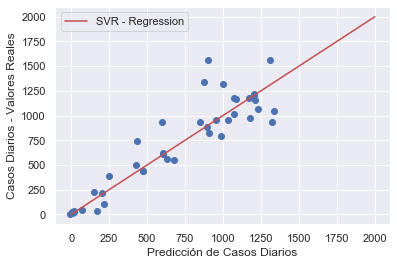

In [454]:
plt.scatter(svr_prediction, ytest)
plt.plot(np.arange(0,2000),np.arange(0,2000), 'r', label='SVR - Regression')
plt.xlabel('Predicción de Casos Diarios')
plt.ylabel('Casos Diarios - Valores Reales')
plt.legend()
print(f'R2 score: {svr_r2:.6f}')
print(f'MSE: {svr_mse:.6f}')
print(f'MAE: {svr_mae:.6f}')

In [455]:
results = results.append({'Model':'SVR',
                                'R2':svr_r2,
                                'MSE':svr_mse,
                                'MAE':svr_mae},ignore_index=True)

##### KNN Regression

In [456]:
n_folds = 10
knn = KNeighborsRegressor()
k_params = np.arange(0,100,2)
knn_params = [{'n_neighbors': k_params}]

gs = GridSearchCV(knn, param_grid=knn_params,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=5, n_jobs=5)

In [457]:
gs.fit(xtrain_scal, ytrain)


Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done 427 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed:    2.0s finished


GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=5,
             param_grid=[{'n_neighbors': array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])}],
             scoring='neg_mean_squared_error', verbose=5)

In [458]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

KNeighborsRegressor(n_neighbors=8) 

{'n_neighbors': 8} 

-66816.65413602939 



In [459]:
knn_prediction = gs.best_estimator_.predict(xtest_scal)
knn_r2 = r2_score(y_true=ytest, y_pred=knn_prediction)
knn_mse = mean_squared_error(y_true=ytest, y_pred=knn_prediction)
knn_mae = mean_absolute_error(y_true=ytest, y_pred=knn_prediction)

R2 score: 0.665938
MAE: 209.630814
MSE: 75539.543968


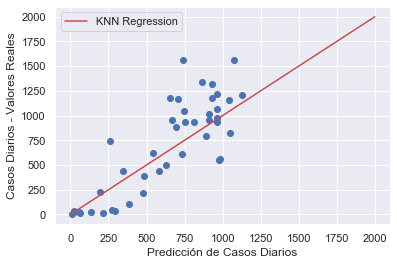

In [460]:
plt.scatter(knn_prediction, ytest)
plt.plot(np.arange(0,2000),np.arange(0,2000), 'r', label='KNN Regression')
plt.xlabel('Predicción de Casos Diarios')
plt.ylabel('Casos Diarios - Valores Reales')
plt.legend()
print(f'R2 score: {knn_r2:.6f}')
print(f'MAE: {knn_mae:.6f}')
print(f'MSE: {knn_mse:.6f}')

In [461]:
results = results.append({'Model':'KNN',
                                'R2':knn_r2,
                                'MSE':knn_mse,
                                'MAE':knn_mae},ignore_index=True)


##### Random Forest

In [462]:
n_estimators=np.arange(10, 300, 10)
n_folds=5
rf = make_regression()

params_rf = {"n_estimators": n_estimators}
regr = RandomForestRegressor(max_depth=2, random_state=0)
gs = GridSearchCV(regr, param_grid=params_rf,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=5, n_jobs=5)

In [463]:
gs.fit(xtrain_scal, ytrain)


Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  97 tasks      | elapsed:   13.5s
[Parallel(n_jobs=5)]: Done 145 out of 145 | elapsed:   27.9s finished
C:\Users\Juan Ignacio\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(max_depth=2, random_state=0),
             n_jobs=5,
             param_grid={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290])},
             scoring='neg_mean_squared_error', verbose=5)

In [464]:
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")


RandomForestRegressor(max_depth=2, n_estimators=170, random_state=0) 

{'n_estimators': 170} 

-18672.583520497476 



In [465]:
rf_prediction = gs.best_estimator_.predict(xtest_scal)
rf_r2 = r2_score(y_true=ytest, y_pred=rf_prediction)
rf_mse = mean_squared_error(y_true=ytest, y_pred=rf_prediction)
rf_mae = mean_absolute_error(y_true=ytest, y_pred=rf_prediction)

R2 score: 0.847
MAE: 124.590
MSE: 34639.112


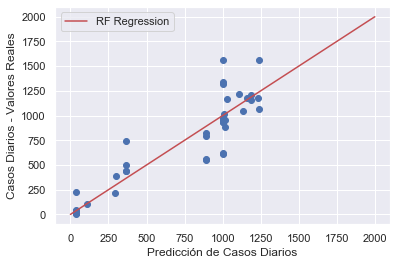

In [466]:
plt.scatter(rf_prediction, ytest)
plt.plot(np.arange(0,2000),np.arange(0,2000), 'r', label='RF Regression')
plt.xlabel('Predicción de Casos Diarios')
plt.ylabel('Casos Diarios - Valores Reales')
plt.legend()
print(f'R2 score: {rf_r2:.3f}')
print(f'MAE: {rf_mae:.3f}')
print(f'MSE: {rf_mse:.3f}')

In [467]:

results = results.append({'Model':'Random Forest',
                                'R2':rf_r2,
                                'MSE':rf_mse,
                                'MAE':rf_mae},ignore_index=True)

In [468]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # Para acotar los decimales en pandas
display(results)

,Model,R2,MSE,MAE
0,Linear Regression,180.337,32521.484,119.643
1,SVR,0.846,34788.084,118.892
2,KNN,0.666,75539.544,209.631
3,Random Forest,0.847,34639.112,124.590


### Regression Model 

#### without considering cases from the day before

In [470]:
caba_regression_final_2 = caba_regression_covid[['fecha_toma_muestra',  'tMax', 'tMin', 'Humedad', 'vVel',
       'pProm', 'Calma', 'Este', 'Noreste', 'Norte',
       'Oeste', 'Sudeste', 'Sudoeste', 'Sur', 'pax_TOTAL',
       'clasificacion']] 

In [471]:
caba_regression_final_2 = caba_regression_final_2.drop_duplicates(subset=["fecha_toma_muestra"], keep="first")
caba_regression_final_2

,fecha_toma_muestra,tMax,tMin,Humedad,vVel,pProm,Calma,Este,Noreste,Norte,Oeste,Sudeste,Sudoeste,Sur,pax_TOTAL,clasificacion
0,2020-03-03,31.800,22.500,70,30,1015.200,0,0,0,1,0,0,0,0,1118806.000,1
1,2020-03-04,32.200,21.000,70,20,1015.550,1,0,0,0,0,0,0,0,1135479.000,1
2,2020-03-05,29.600,21.600,70,24,1017.000,0,0,0,1,0,0,0,0,1164013.000,4
6,2020-03-06,30.100,21.000,75,24,1013.950,1,0,0,0,0,0,0,0,1141886.000,2
7,2020-03-08,31.200,23.200,66,23,1009.150,0,0,0,1,0,0,0,0,232414.000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122513,2020-09-28,23.600,7.300,59,36,1010.300,0,0,0,0,0,0,1,0,84759.000,935
123426,2020-09-29,24.400,13.900,64,36,1008.850,0,0,0,1,0,0,0,0,92183.000,958
124341,2020-09-30,27.600,14.900,70,27,1004.850,0,0,0,1,0,0,0,0,91911.000,955
125264,2020-10-01,22.400,13.400,55,31,1009.300,0,0,0,0,0,0,0,1,991589.000,871


In [472]:
y2 = caba_regression_final_2[["clasificacion"]]


In [473]:
caba_regression_final_2.columns

Index(['fecha_toma_muestra', 'tMax', 'tMin', 'Humedad', 'vVel', 'pProm',
       'Calma', 'Este', 'Noreste', 'Norte', 'Oeste', 'Sudeste', 'Sudoeste',
       'Sur', 'pax_TOTAL', 'clasificacion'],
      dtype='object')

In [474]:
x2 = caba_regression_final_2[['tMax', 'tMin', 'Humedad', 'vVel', 'pProm',
       'pax_TOTAL', 'Calma', 'Este', 'Noreste', 'Norte', 'Oeste', 'Sudeste',
       'Sudoeste', 'Sur', "pax_TOTAL"]]

In [475]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2, y2, test_size=0.20, random_state=42)


In [476]:
scaler = preprocessing.StandardScaler().fit(xtrain2)
scaler

StandardScaler()

In [477]:
xtrain2_scal = scaler.transform(xtrain2)


In [478]:
xtest2_scal = scaler.transform(xtest2)


In [479]:
results2 = pd.DataFrame(columns=['Model','R2','MSE','MAE'])


In [480]:
lr = LinearRegression()

In [481]:
lr.fit(xtrain2_scal, ytrain2)

LinearRegression()

In [482]:
ypred2 = lr.predict(xtest2_scal)

In [483]:
np.sqrt(mean_squared_error(ytest2, ypred2))

473.312771332365

In [484]:
mean_squared_error(ytest2, ypred2)

224024.97950632367

##### Support Vector Regression 
##### without considering cases from the day before

In [485]:
n_folds = 8
est = SVR(max_iter=20000)
# Lista del parametro lambda (parametro 'alpha')
parameters = {'C' : [0.1, 1, 10, 50, 100, 500, 2000,50000],
              'gamma':[0.01, 0.05,0.1,0.5,1,10],
            "kernel":["rbf", "gauss"]}

gs2 = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=5, n_jobs=5)

In [486]:
gs2.fit(xtrain2_scal, ytrain2)


Fitting 8 folds for each of 96 candidates, totalling 768 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    4.3s
[Parallel(n_jobs=5)]: Done 151 tasks      | elapsed:    5.0s
[Parallel(n_jobs=5)]: Done 759 out of 768 | elapsed:    6.7s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 768 out of 768 | elapsed:    6.7s finished
C:\Users\Juan Ignacio\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=8, estimator=SVR(max_iter=20000), n_jobs=5,
             param_grid={'C': [0.1, 1, 10, 50, 100, 500, 2000, 50000],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 10],
                         'kernel': ['rbf', 'gauss']},
             scoring='neg_mean_squared_error', verbose=5)

In [490]:
print(gs2.best_estimator_, "\n")
print(gs2.best_params_, "\n")
print(gs2.best_score_, "\n")

SVR(C=2000, gamma=0.01, max_iter=20000) 

{'C': 2000, 'gamma': 0.01, 'kernel': 'rbf'} 

-158156.2351820039 



In [494]:
svr2_prediction = gs2.best_estimator_.predict(xtest2_scal)
svr2_r2 = r2_score(y_true=ytest2, y_pred2=svr2_prediction)
svr2_mse = mean_squared_error(y_true=ytest2, y_pred2=svr2_prediction)
svr2_mae = mean_absolute_error(y_true=ytest2, y_pred2=svr2_prediction)

TypeError: r2_score() got an unexpected keyword argument 'y_pred2'

R2 score: 0.024270
MSE: 220636.415865
MAE: 355.274004


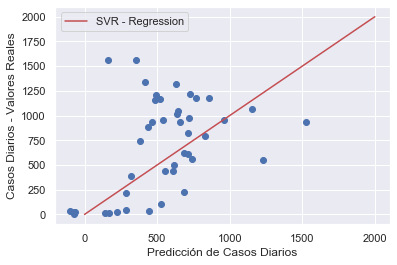

In [495]:
plt.scatter(svr2_prediction, ytest2)
plt.plot(np.arange(0,2000),np.arange(0,2000), 'r', label='SVR - Regression')
plt.xlabel('Predicción de Casos Diarios')
plt.ylabel('Casos Diarios - Valores Reales')
plt.legend()
print(f'R2 score: {svr2_r2:.6f}')
print(f'MSE: {svr2_mse:.6f}')
print(f'MAE: {svr2_mae:.6f}')